In [1]:
import logging
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyobsbox import Checker

In [3]:
logging.getLogger("pyobsbox").setLevel(logging.WARNING)
logging.getLogger("pyobsbox.plotter").setLevel(logging.DEBUG)

# List models

In [4]:
models_folder = Path("../../models")

In [5]:
[model.name for model in list(models_folder.glob('model_*'))]

['model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42',
 'model_dense_512_128_32_8_B1H_Inst_center_scale_100_seed_42',
 'model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_seed_42',
 'model_time_dist_32_16_B1H_Inst_500',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_stride_4_B1H_Inst',
 'model_conv_32_16_stride_4_B1H_Inst_jorg',
 'model_conv_max_pool_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42',
 'model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_2049_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_100_seed_42',
 'model_conv_32_16_8_stride_4_B1H_Inst_presplit_znorm_seed_42',
 'model_conv_32

In [6]:
model_path = models_folder / "model_conv_64_32_16_8_stride_4_noDO_decode_B1H_Inst_min_max_rolling_avg_std_window_513_seed_42"

In [7]:
checker = Checker(model_path)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 512, 64)           960       
_________________________________________________________________
dropout (Dropout)            (None, 512, 64)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 128, 32)           14368     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 16)            3600      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 8)              9

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

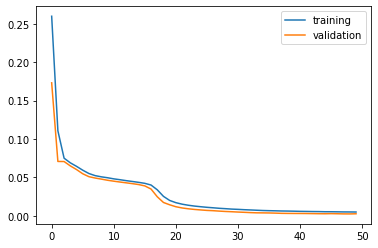

In [8]:
checker.plot_loss()

In [9]:
train_data, train_meta = checker.load_train_dataset()
train_prediction = checker.predict(train_data)


50/50 [==============================] - 61s 1s/step


In [10]:
train_meta.head()

type  fill  beam plane  q           date_time  \
6264  Inst  6595     1     h  7 2018-04-23 01:30:14   
6094  Inst  6436     1     h  7 2017-11-30 07:12:28   
368   Inst  7475     1     h  7 2018-11-26 18:01:14   
288   Inst  6621     1     h  7 2018-04-29 04:25:15   
3237  Inst  6956     1     h  7 2018-07-21 20:11:48   

                                                   file  n_bunches  \
6264  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6595/...        339   
6094  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6436/...        408   
368   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7475/...        733   
288   /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6621/...        650   
3237  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6956/...       2556   

      bunch_index  bunch_number  ts_length  chunk  
6264       2082.0         250.0      65536     24  
6094       1012.0         103.0      65536     23  
368        3436.0         730.0      65536      1  
288        1073.0         344.0      65536      1  
3237       3356.0        2506.0      65536     12

In [11]:
train_meta.shape

(396800, 12)

In [12]:
train_data.shape

(396800, 2048, 2)

In [13]:
train_prediction.shape

(396800, 2048, 2)

In [14]:
validation_data, validation_meta = checker.load_validation_dataset()
validation_prediction = checker.predict(validation_data)


5/5 [==============================] - 5s 989ms/step


In [15]:
validation_meta.head()

type  fill  beam plane  q           date_time  \
4808  Inst  6370     1     h  7 2017-11-09 03:07:14   
1244  Inst  6598     1     h  7 2018-04-23 12:11:34   
5767  Inst  7483     1     h  7 2018-11-29 09:52:15   
7206  Inst  7443     1     h  7 2018-11-14 04:40:14   
7624  Inst  6370     1     h  7 2017-11-09 03:07:14   

                                                   file  n_bunches  \
4808  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6370/...       1868   
1244  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6598/...        516   
5767  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7483/...        648   
7206  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7443/...        336   
7624  /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6370/...       1868   

      bunch_index  bunch_number  ts_length  chunk  
4808       2256.0        1218.0      65536     18  
1244        462.0         365.0      65536      4  
5767       2940.0         548.0      65536     22  
7206       1771.0         330.0      65536     28  
7624       2256.0        1218.0      65536     29

In [16]:
validation_meta.shape

(39680, 12)

In [17]:
validation_data.shape

(39680, 2048, 2)

In [18]:
validation_prediction.shape

(39680, 2048, 2)

In [19]:
def plot_train_index(index: int):
    """Helper function to plot a sample from the train dataset.
    """
    true_signal = train_data[index]
    predicted_signal = train_prediction[index]
    metadata_row = train_meta.iloc[index]
    print(f"index: {index}")
    print(f"Error: {train_error[index]}")
    print(metadata_row)
    checker.plot_sample(metadata_row, true_signal, predicted_signal)
    plt.show()
    encoded = checker.encode(true_signal)
    plt.imshow(encoded)
    plt.show()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

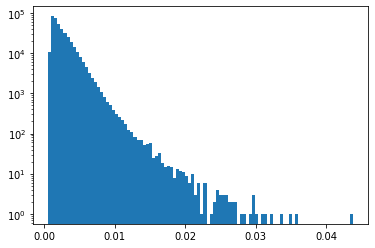

In [20]:
train_error = checker.MSE(train_data, train_prediction)
checker.plot_error(train_error, bins=100)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

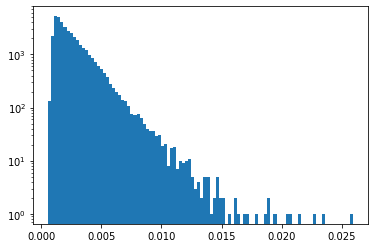

In [21]:
validation_error = checker.MSE(validation_data, validation_prediction)
checker.plot_error(validation_error, bins=100)

In [22]:
# Histogram peak
hist, bins = np.histogram(train_error, bins=100)
hist_peak = bins[np.argmax(hist)]

index: 0
Error: 0.0018976215159973702
type                                                         Inst
fill                                                         6595
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-04-23 01:30:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6595/...
n_bunches                                                     339
bunch_index                                                  2082
bunch_number                                                  250
ts_length                                                   65536
chunk                                                          24
Name: 6264, dtype: object


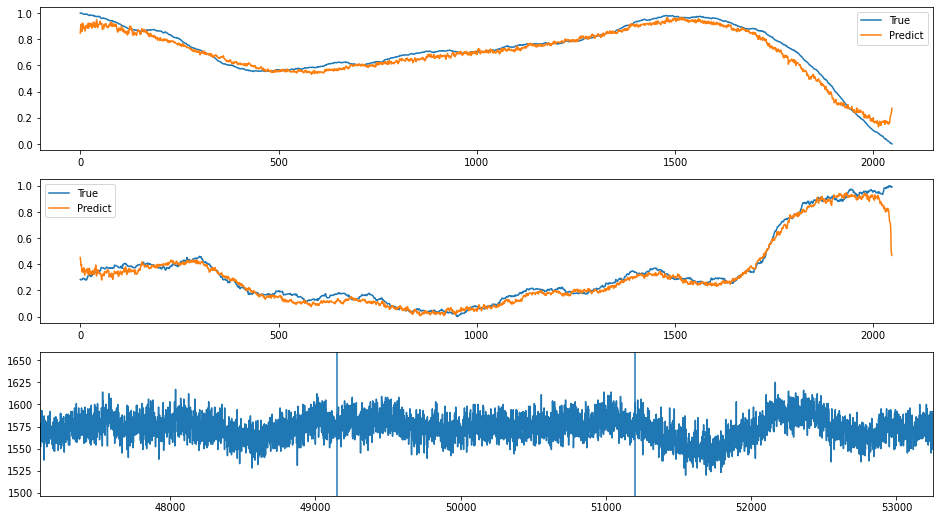

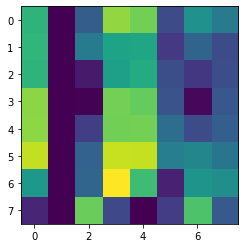

In [23]:
# plotting a random sample
plot_train_index(0)

In [24]:
sorted_error_indices = np.argsort(train_error)

# From left to right

index: 325923
Error: 0.0005775646229624101
type                                                         Inst
fill                                                         6690
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 10:17:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...
n_bunches                                                    1227
bunch_index                                                  1126
bunch_number                                                  390
ts_length                                                   65536
chunk                                                          11
Name: 2845, dtype: object


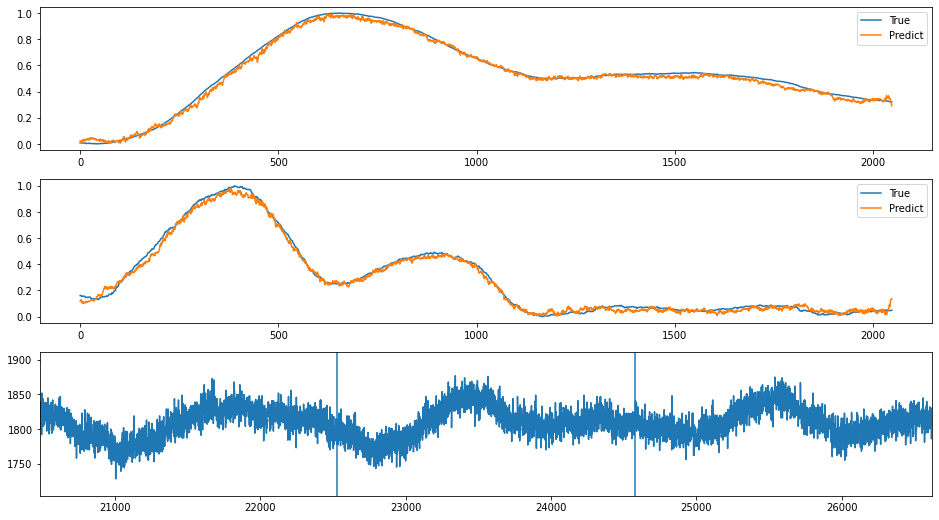

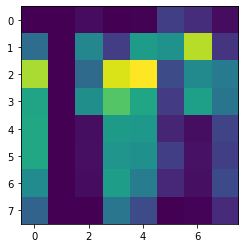

index: 345695
Error: 0.0005928700787399381
type                                                         Inst
fill                                                         6690
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 10:17:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...
n_bunches                                                    1227
bunch_index                                                  1172
bunch_number                                                  429
ts_length                                                   65536
chunk                                                          11
Name: 2968, dtype: object


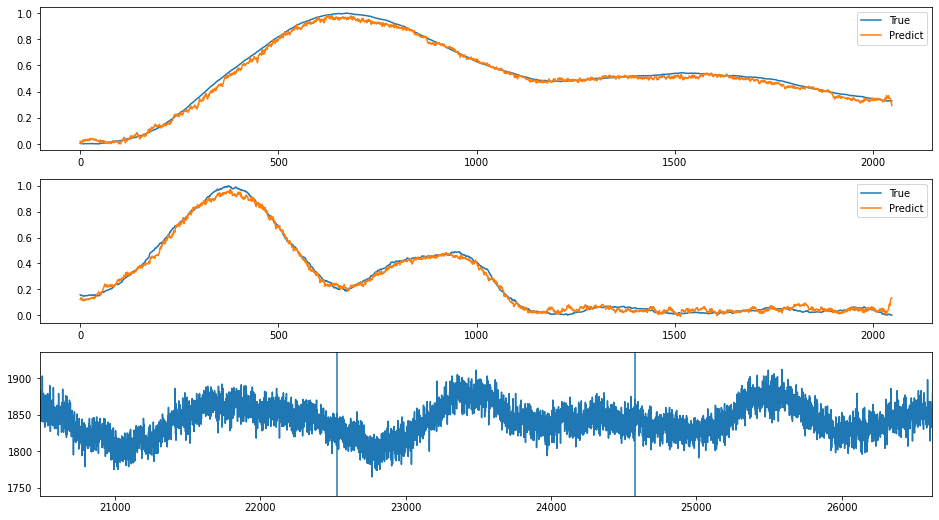

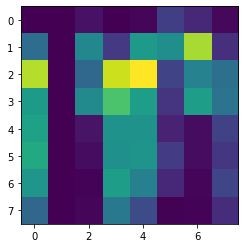

index: 139277
Error: 0.0005988680065530758
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 00:04:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                    1868
bunch_index                                                  1094
bunch_number                                                  585
ts_length                                                   65536
chunk                                                          17
Name: 4509, dtype: object


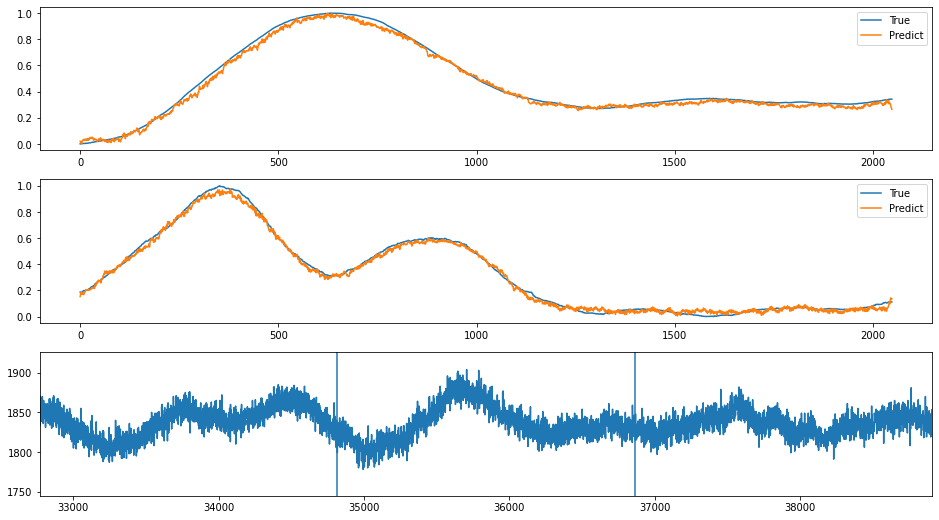

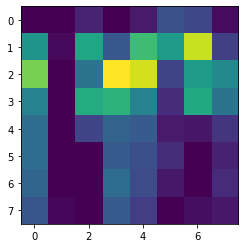

index: 201470
Error: 0.0006046319736096201
type                                                         Inst
fill                                                         6278
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-07 00:04:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6278/...
n_bunches                                                    1868
bunch_index                                                  1770
bunch_number                                                  940
ts_length                                                   65536
chunk                                                          17
Name: 4357, dtype: object


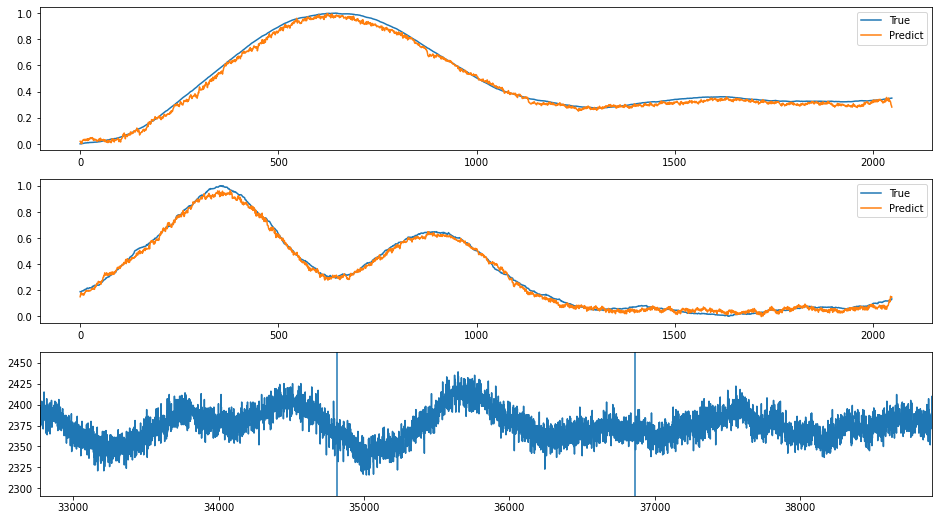

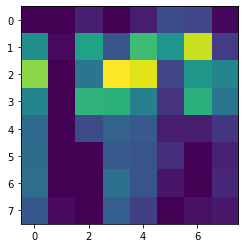

index: 35538
Error: 0.0006110477764540752
type                                                         Inst
fill                                                         6961
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-23 02:56:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6961/...
n_bunches                                                    2556
bunch_index                                                  3400
bunch_number                                                 2543
ts_length                                                   65536
chunk                                                           5
Name: 1381, dtype: object


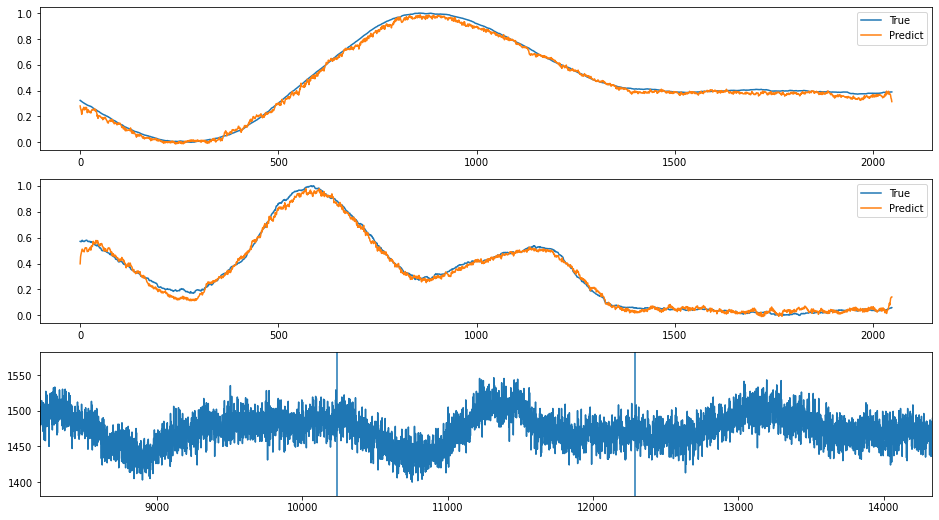

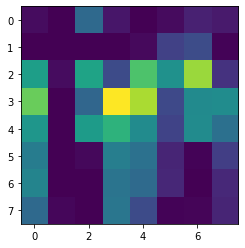

index: 179262
Error: 0.0006168123097610302
type                                                         Inst
fill                                                         6690
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 04:05:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...
n_bunches                                                    1227
bunch_index                                                  2918
bunch_number                                                 1020
ts_length                                                   65536
chunk                                                          24
Name: 6263, dtype: object


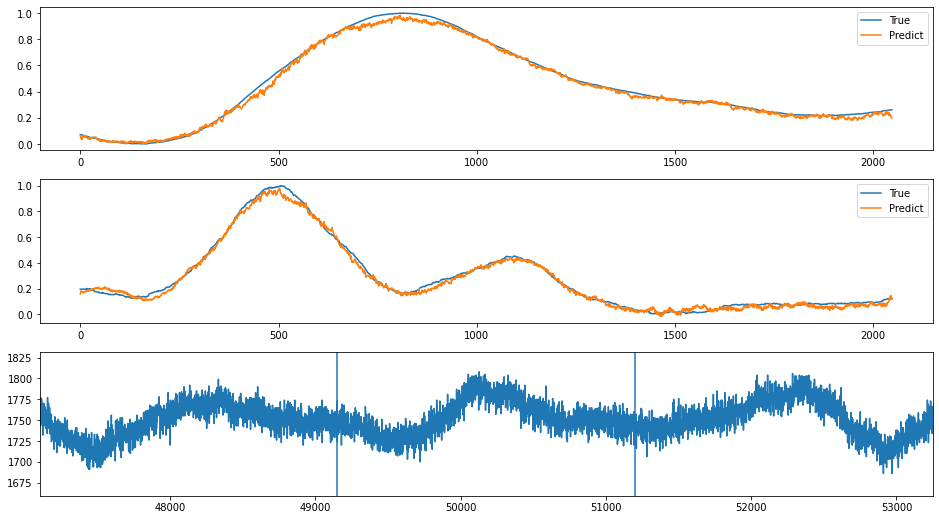

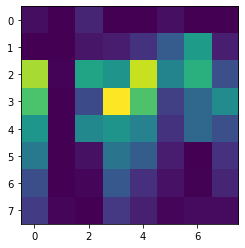

index: 180592
Error: 0.0006279823819770381
type                                                         Inst
fill                                                         6858
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-28 08:13:28
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6858/...
n_bunches                                                    1227
bunch_index                                                  2060
bunch_number                                                  760
ts_length                                                   65536
chunk                                                           3
Name: 989, dtype: object


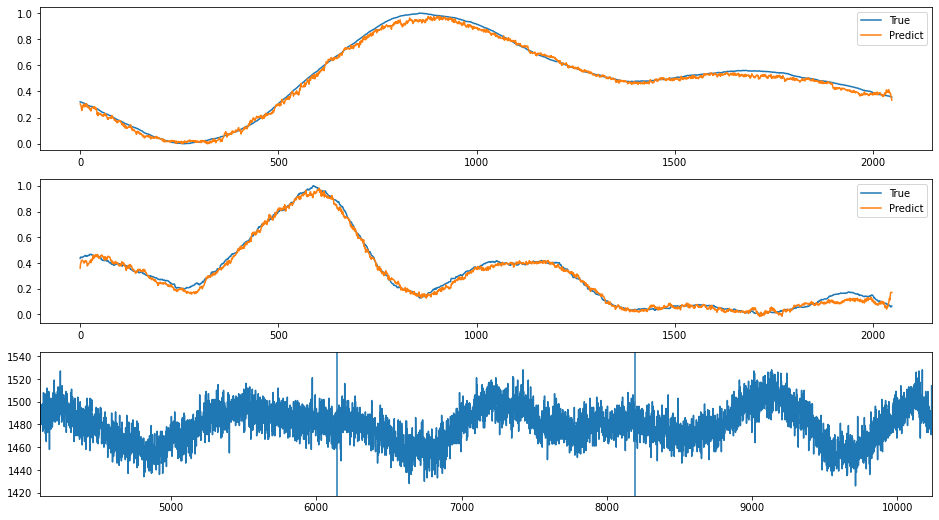

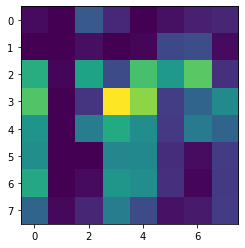

index: 87560
Error: 0.0006319606060151601
type                                                         Inst
fill                                                         6891
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-06 17:40:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6891/...
n_bunches                                                    1452
bunch_index                                                   432
bunch_number                                                  166
ts_length                                                   65536
chunk                                                          16
Name: 4172, dtype: object


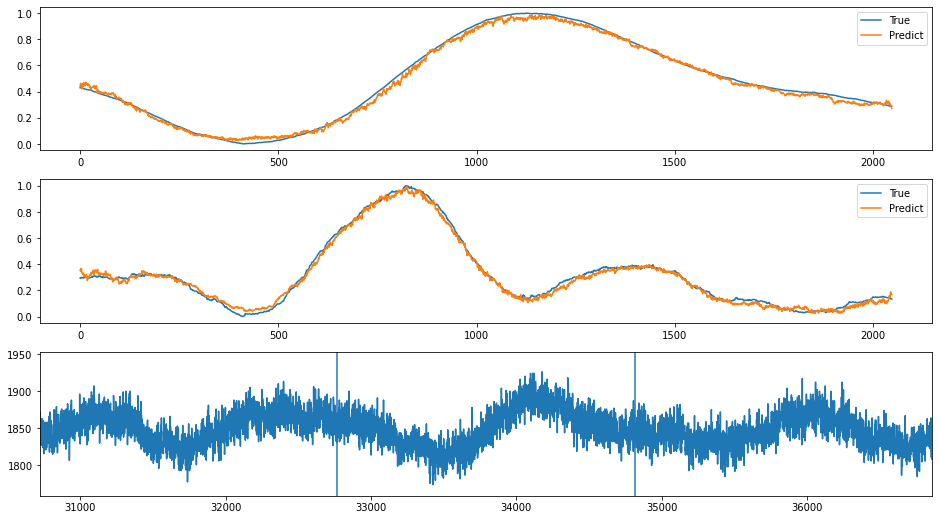

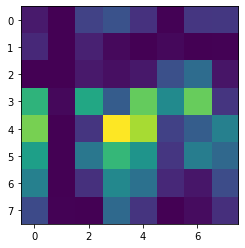

index: 221285
Error: 0.0006328682721796092
type                                                         Inst
fill                                                         6919
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-13 17:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6919/...
n_bunches                                                    2556
bunch_index                                                  1948
bunch_number                                                 1448
ts_length                                                   65536
chunk                                                           2
Name: 611, dtype: object


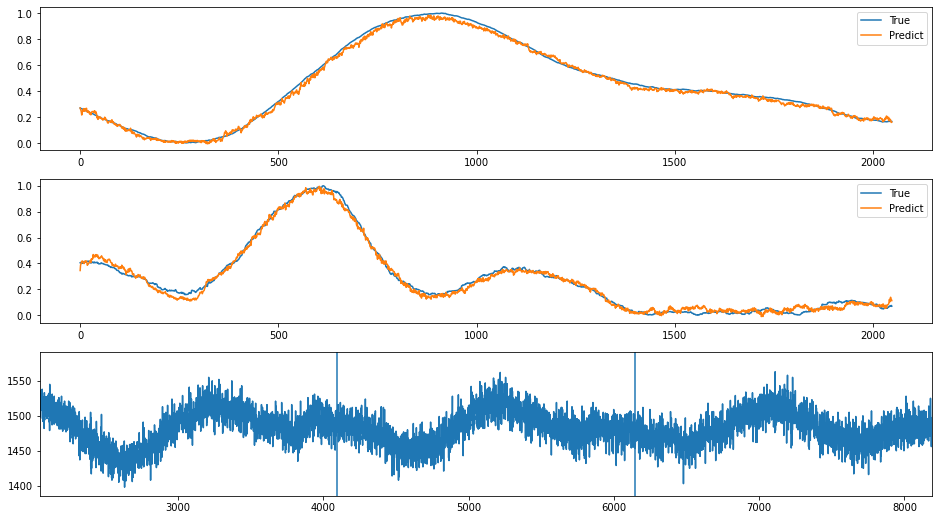

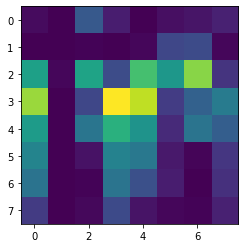

index: 57774
Error: 0.0006337329929949306
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 05:51:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                    1836
bunch_index                                                  3114
bunch_number                                                 1656
ts_length                                                   65536
chunk                                                          25
Name: 6563, dtype: object


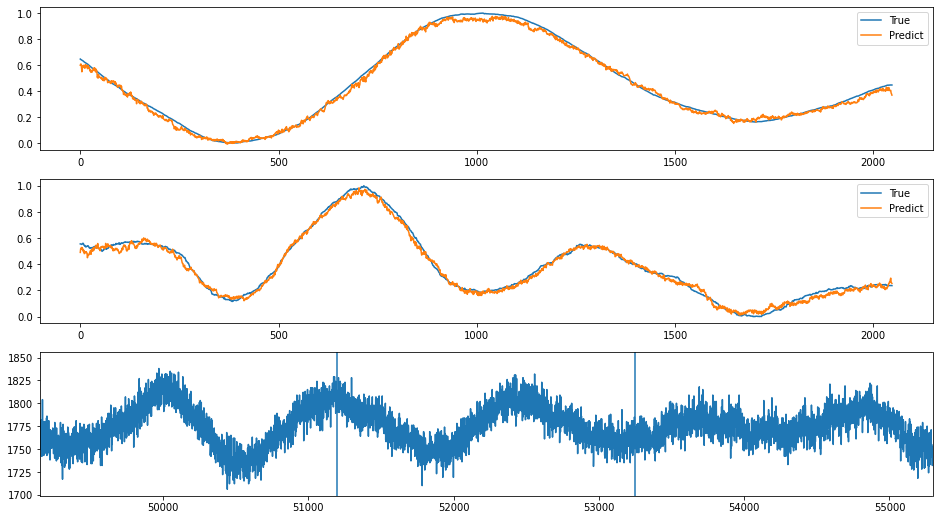

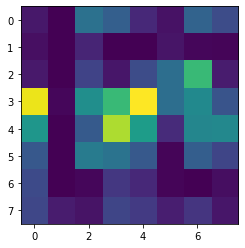

In [25]:
for i in range(10):
    index = sorted_error_indices[i]
    plot_train_index(index)

# From right to left

index: 91183
Error: 0.04374170867308465
type                                                         Inst
fill                                                         6630
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-02 01:10:47
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6630/...
n_bunches                                                     926
bunch_index                                                  1443
bunch_number                                                  878
ts_length                                                   65536
chunk                                                          28
Name: 7276, dtype: object


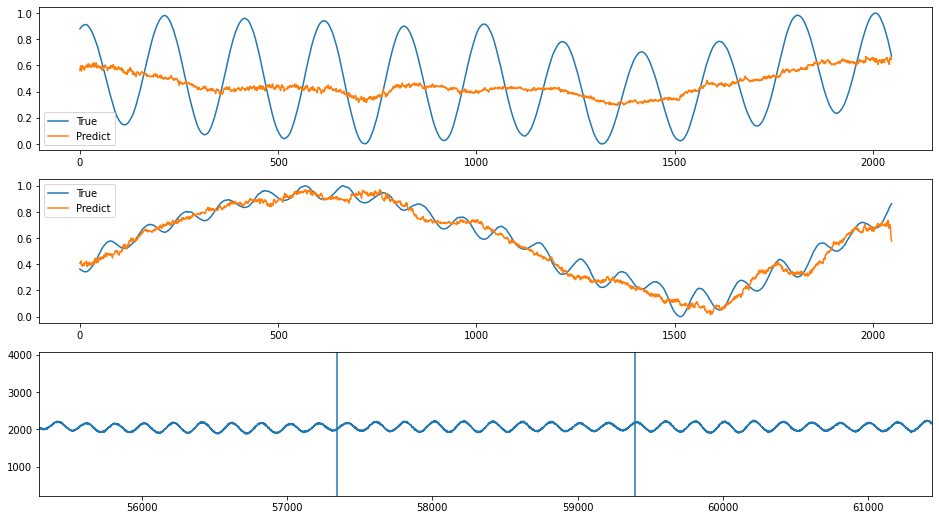

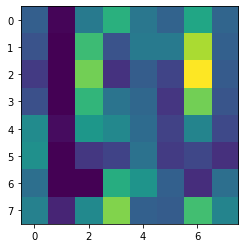

index: 350408
Error: 0.035861778430694935
type                                                         Inst
fill                                                         6393
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-16 16:01:24
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6393/...
n_bunches                                                     620
bunch_index                                                   880
bunch_number                                                  434
ts_length                                                   65536
chunk                                                          15
Name: 3892, dtype: object


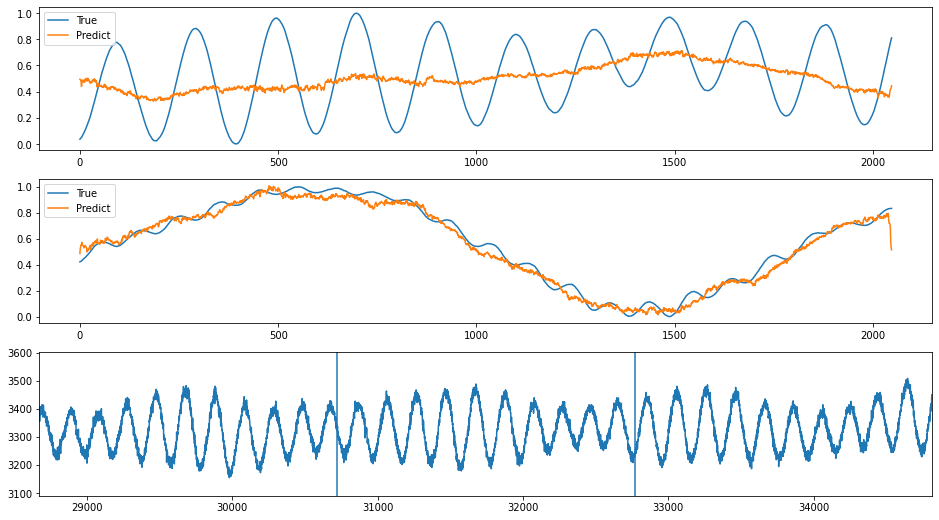

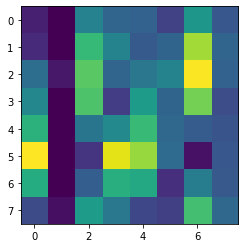

index: 257734
Error: 0.034926486092524744
type                                                         Inst
fill                                                         6220
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-17 21:25:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6220/...
n_bunches                                                     228
bunch_index                                                  1336
bunch_number                                                   84
ts_length                                                   65536
chunk                                                           8
Name: 2113, dtype: object


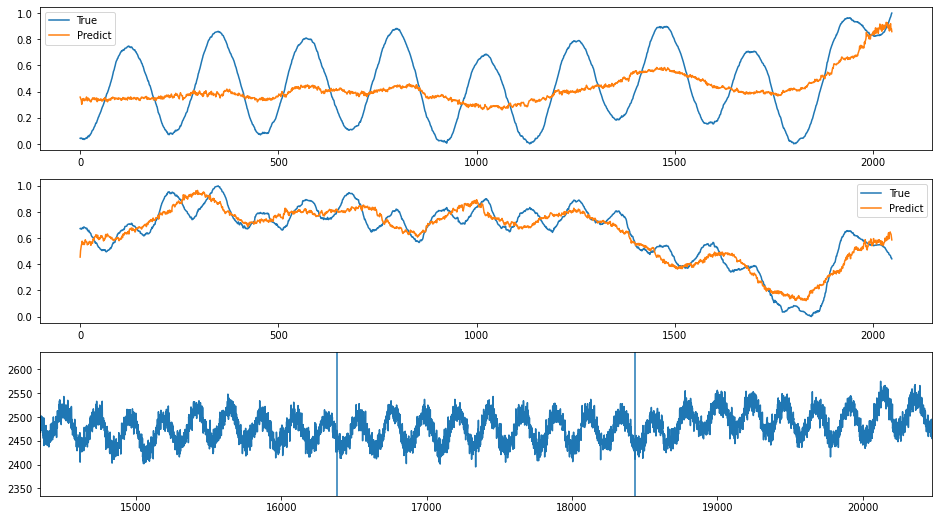

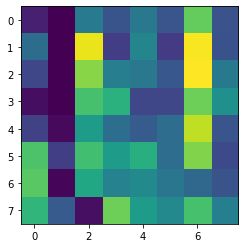

index: 189694
Error: 0.03355238409613869
type                                                         Inst
fill                                                         6746
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-31 15:58:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6746/...
n_bunches                                                     780
bunch_index                                                   831
bunch_number                                                  586
ts_length                                                   65536
chunk                                                          24
Name: 6152, dtype: object


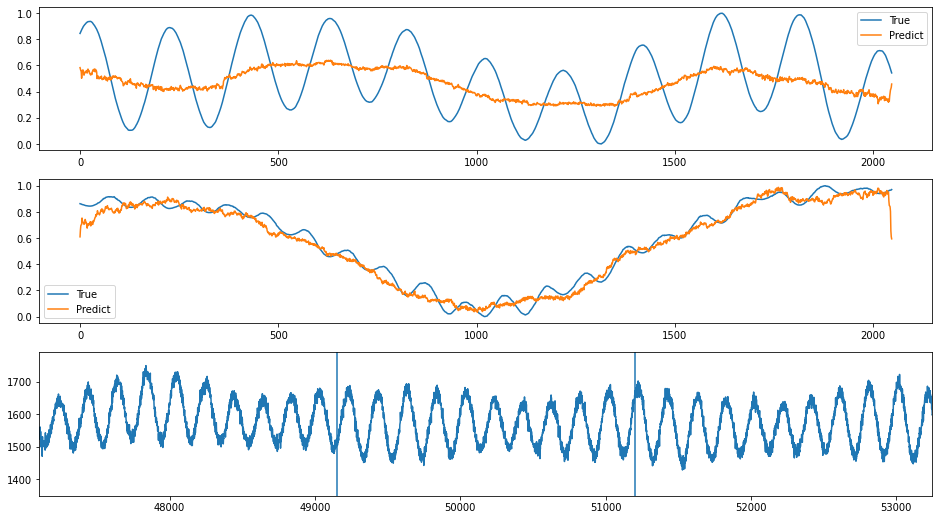

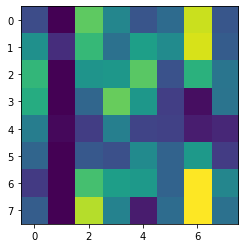

index: 243387
Error: 0.03233001011554899
type                                                         Inst
fill                                                         6640
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-04 08:49:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6640/...
n_bunches                                                     156
bunch_index                                                   192
bunch_number                                                  123
ts_length                                                   65536
chunk                                                          13
Name: 3555, dtype: object


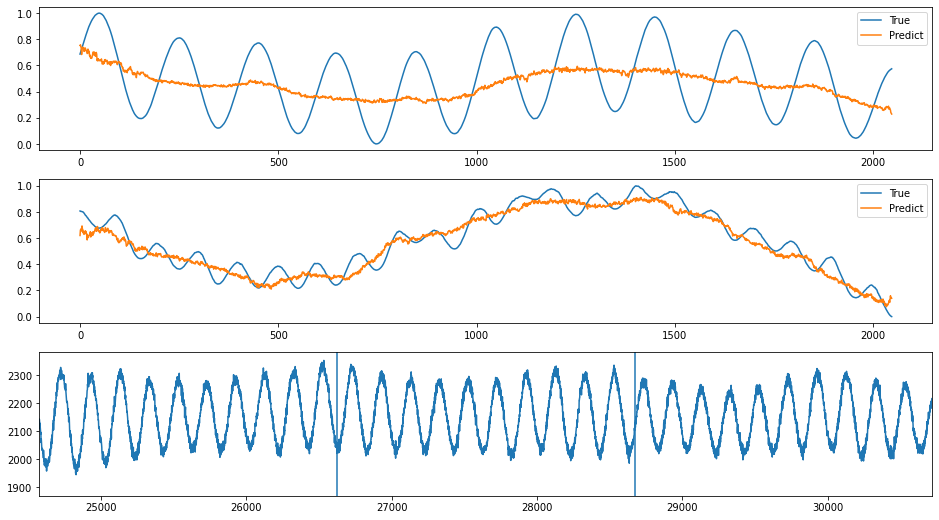

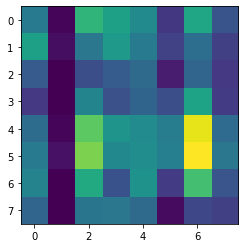

index: 49592
Error: 0.03129429008817114
type                                                         Inst
fill                                                         6640
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-04 09:01:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6640/...
n_bunches                                                    1116
bunch_index                                                  1434
bunch_number                                                 1060
ts_length                                                   65536
chunk                                                          12
Name: 3158, dtype: object


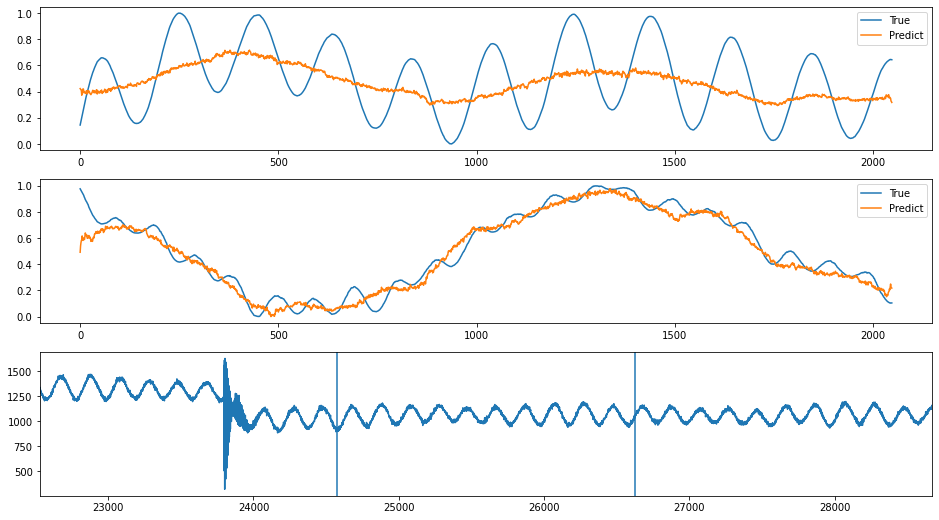

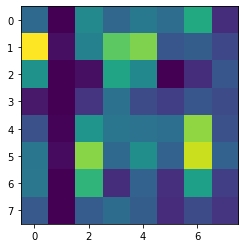

index: 50500
Error: 0.031021642213250832
type                                                         Inst
fill                                                         6768
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-08 07:59:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6768/...
n_bunches                                                     636
bunch_index                                                   849
bunch_number                                                  597
ts_length                                                   65536
chunk                                                          20
Name: 5259, dtype: object


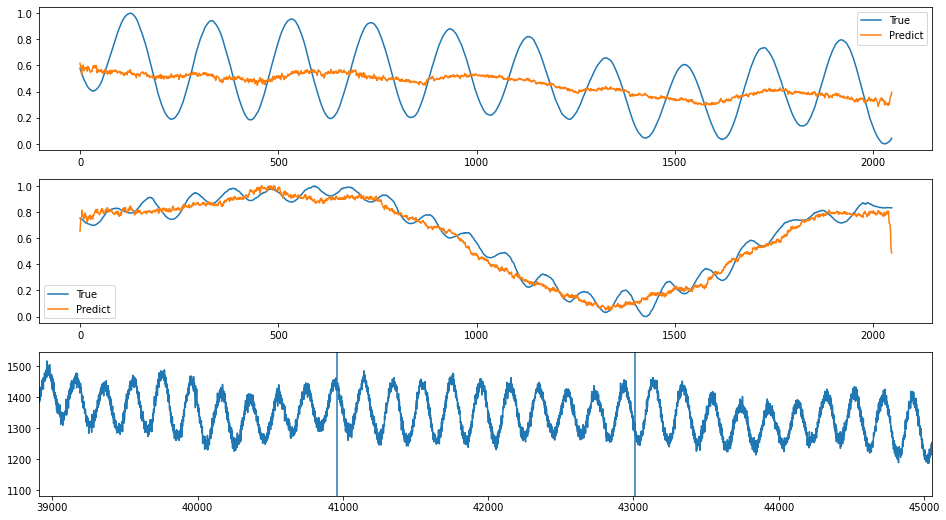

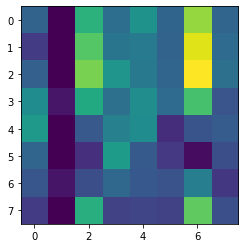

index: 110081
Error: 0.030093809510974984
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   428
bunch_number                                                  200
ts_length                                                   65536
chunk                                                          16
Name: 4325, dtype: object


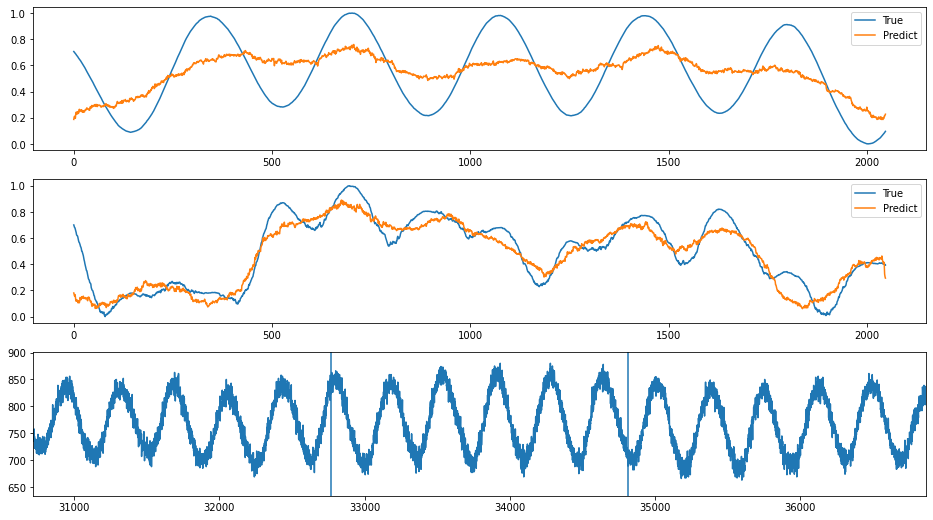

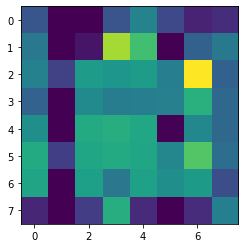

index: 371399
Error: 0.029751011098983347
type                                                         Inst
fill                                                         6337
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-27 05:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6337/...
n_bunches                                                    1004
bunch_index                                                   302
bunch_number                                                  161
ts_length                                                   65536
chunk                                                          10
Name: 2612, dtype: object


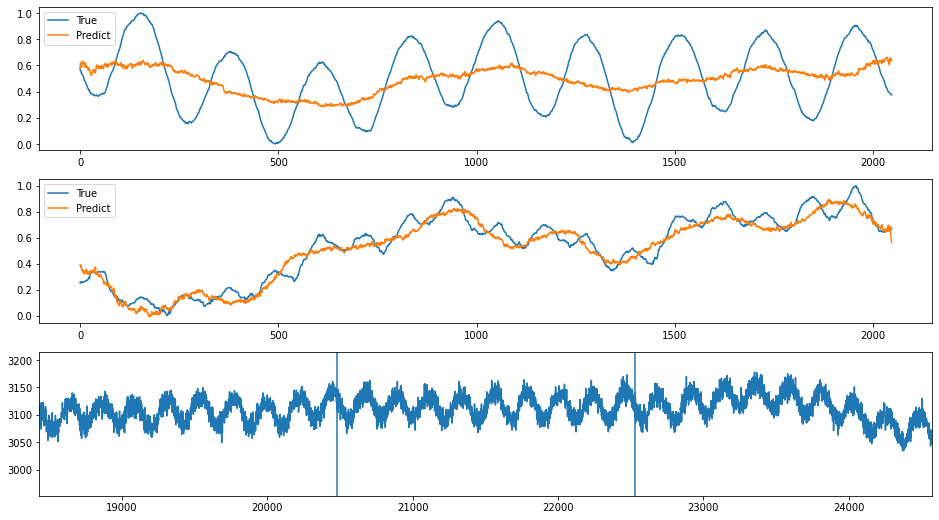

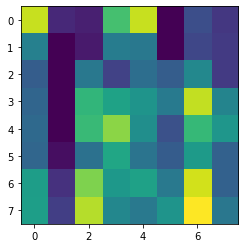

index: 106319
Error: 0.029596024424790365
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   428
bunch_number                                                  200
ts_length                                                   65536
chunk                                                           9
Name: 2533, dtype: object


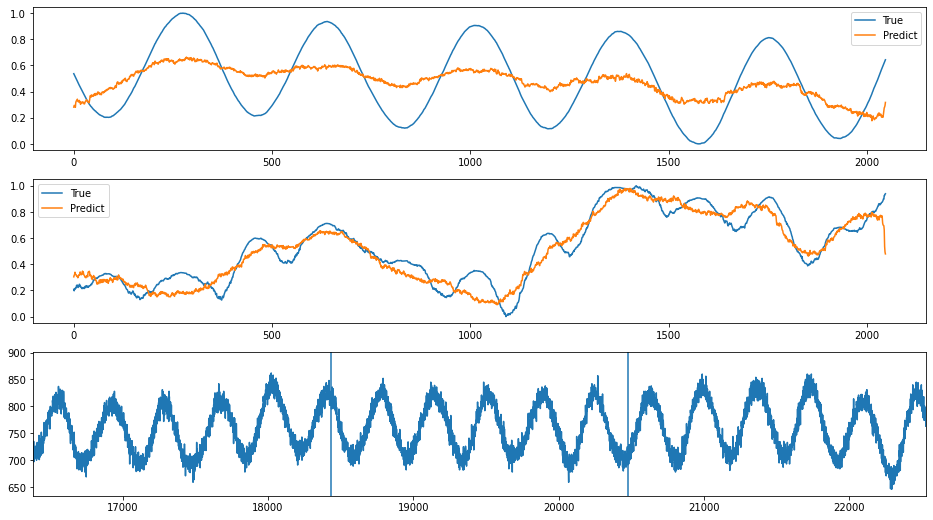

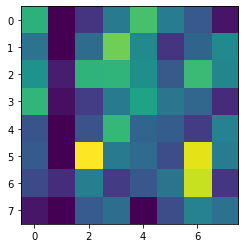

index: 74039
Error: 0.02954211965158208
type                                                         Inst
fill                                                         6752
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-02 11:34:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6752/...
n_bunches                                                    1068
bunch_index                                                  1339
bunch_number                                                  966
ts_length                                                   65536
chunk                                                          26
Name: 6798, dtype: object


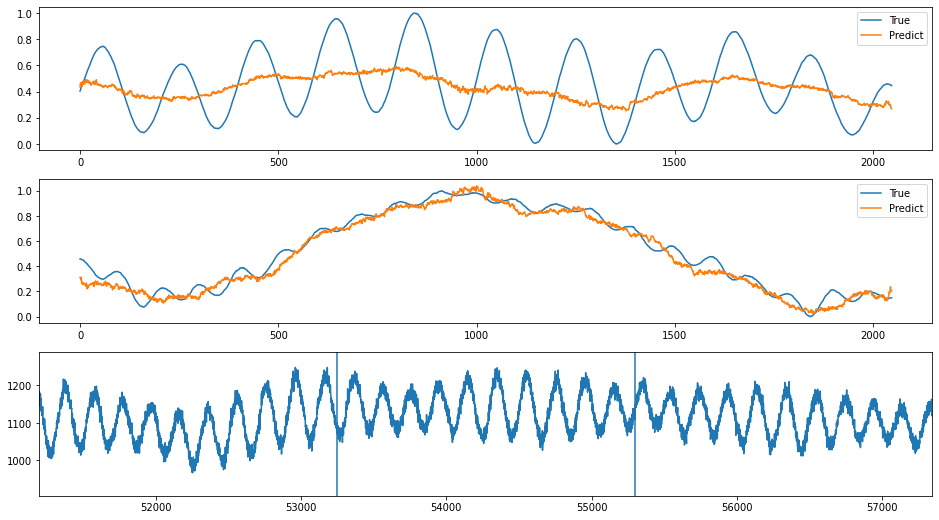

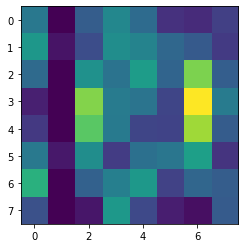

index: 189984
Error: 0.02930165650136974
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                  1035
bunch_number                                                  571
ts_length                                                   65536
chunk                                                          27
Name: 7011, dtype: object


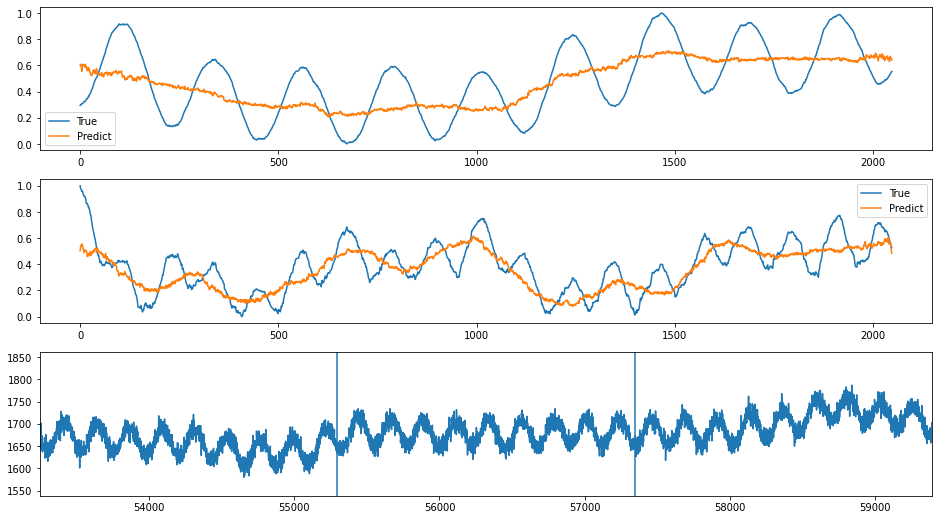

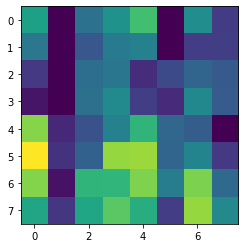

index: 20652
Error: 0.028573285303538178
type                                                         Inst
fill                                                         6731
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-27 20:56:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6731/...
n_bunches                                                     780
bunch_index                                                   984
bunch_number                                                  694
ts_length                                                   65536
chunk                                                          26
Name: 6663, dtype: object


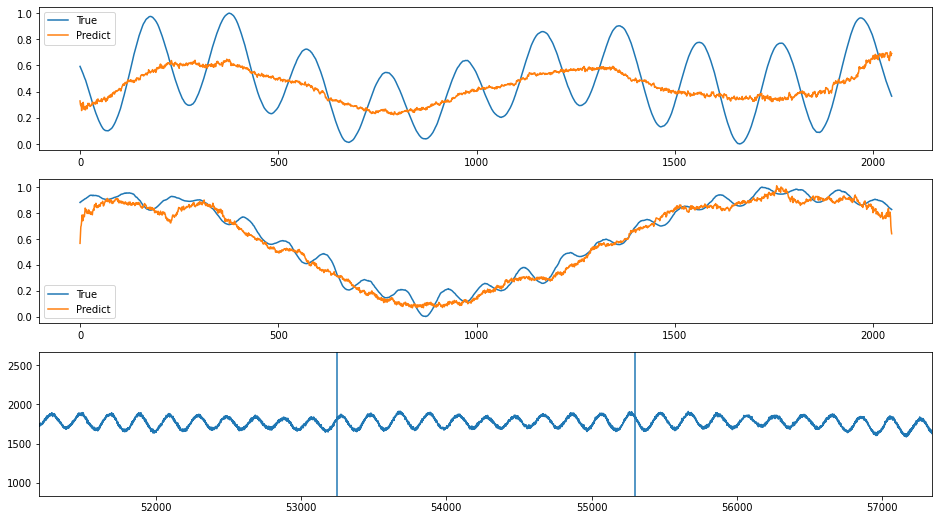

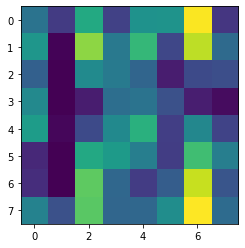

index: 128884
Error: 0.027918373981609894
type                                                         Inst
fill                                                         6413
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-23 19:26:11
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6413/...
n_bunches                                                     172
bunch_index                                                   304
bunch_number                                                  163
ts_length                                                   65536
chunk                                                          14
Name: 3667, dtype: object


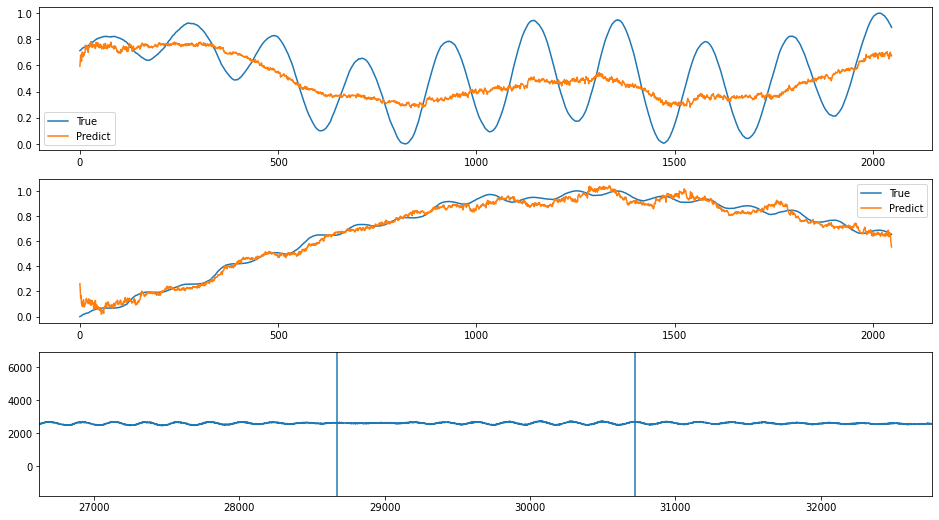

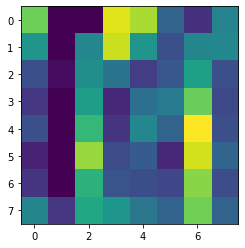

index: 359155
Error: 0.027153445409188234
type                                                         Inst
fill                                                         6256
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-30 02:05:42
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6256/...
n_bunches                                                      12
bunch_index                                                     8
bunch_number                                                    1
ts_length                                                   65536
chunk                                                          13
Name: 3399, dtype: object


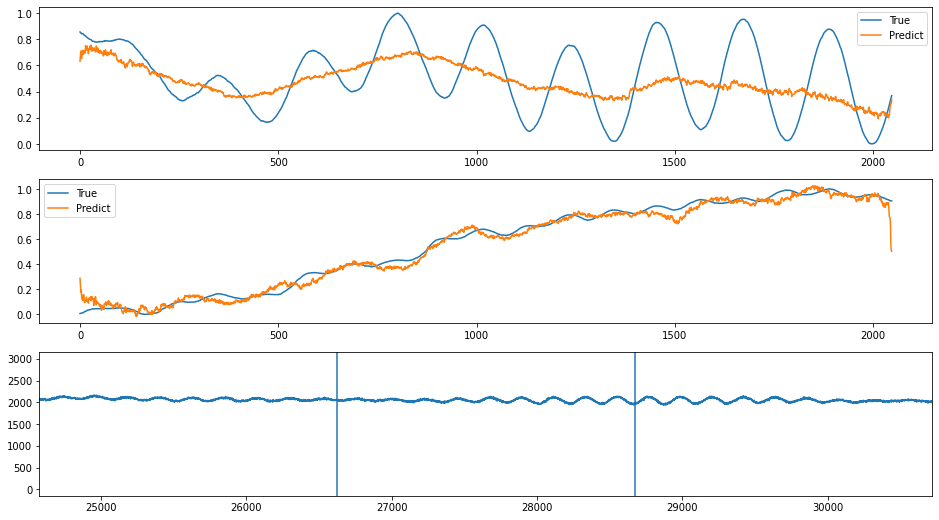

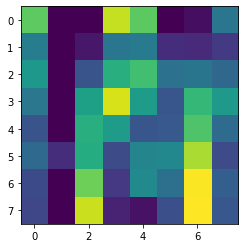

index: 213533
Error: 0.02700937964578958
type                                                         Inst
fill                                                         6363
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-05 20:57:12
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6363/...
n_bunches                                                    1004
bunch_index                                                  1861
bunch_number                                                 1000
ts_length                                                   65536
chunk                                                          17
Name: 4555, dtype: object


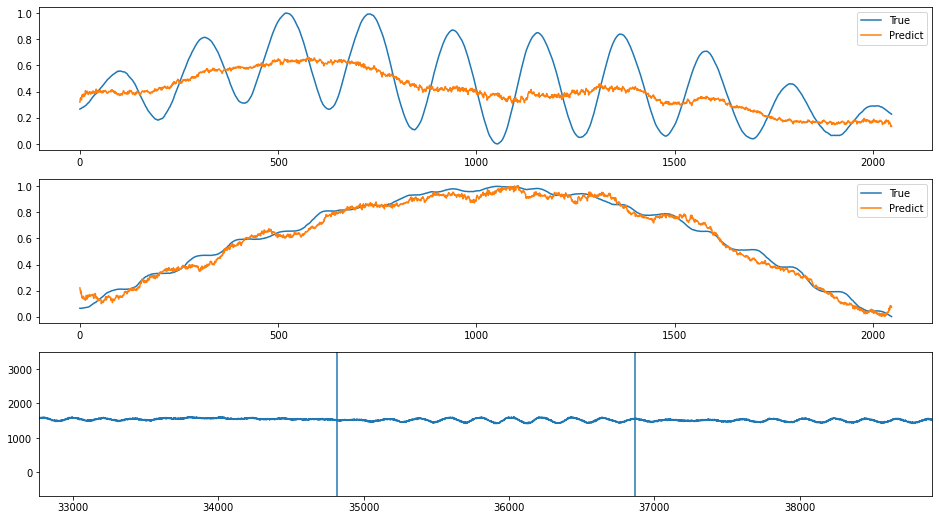

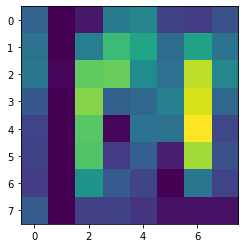

index: 102916
Error: 0.026865563826164347
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 01:16:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                     300
bunch_index                                                   441
bunch_number                                                  221
ts_length                                                   65536
chunk                                                          28
Name: 7325, dtype: object


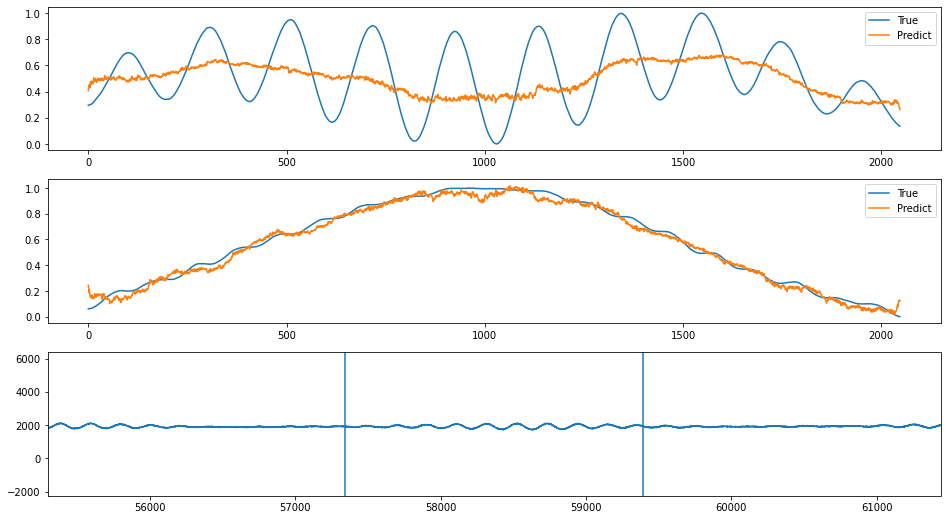

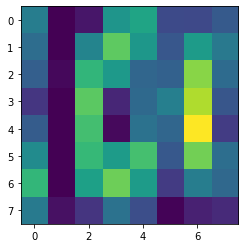

index: 64393
Error: 0.02676473819962264
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                   420
bunch_number                                                  221
ts_length                                                   65536
chunk                                                          27
Name: 7087, dtype: object


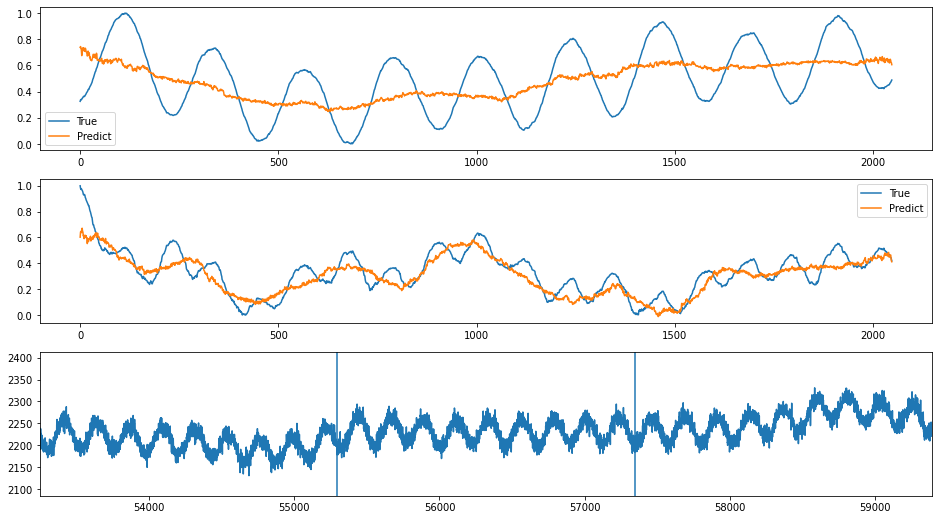

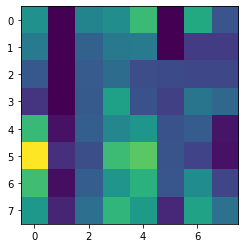

index: 55785
Error: 0.02634481557970613
type                                                         Inst
fill                                                         6404
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-21 17:06:56
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6404/...
n_bunches                                                     495
bunch_index                                                  2179
bunch_number                                                  373
ts_length                                                   65536
chunk                                                          20
Name: 5272, dtype: object


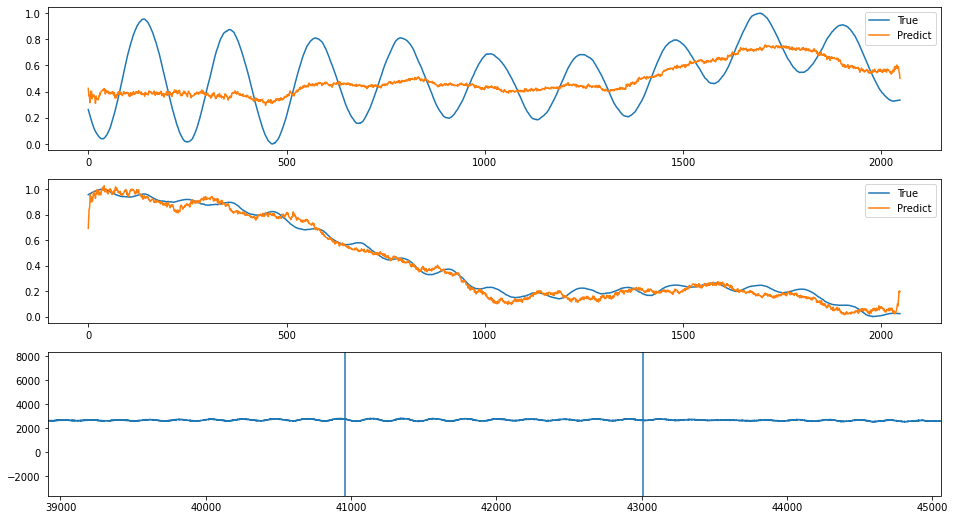

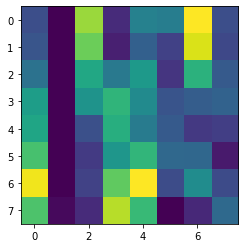

index: 96804
Error: 0.026173402973868054
type                                                         Inst
fill                                                         6763
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-06 23:48:33
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6763/...
n_bunches                                                     780
bunch_index                                                   979
bunch_number                                                  689
ts_length                                                   65536
chunk                                                          25
Name: 6634, dtype: object


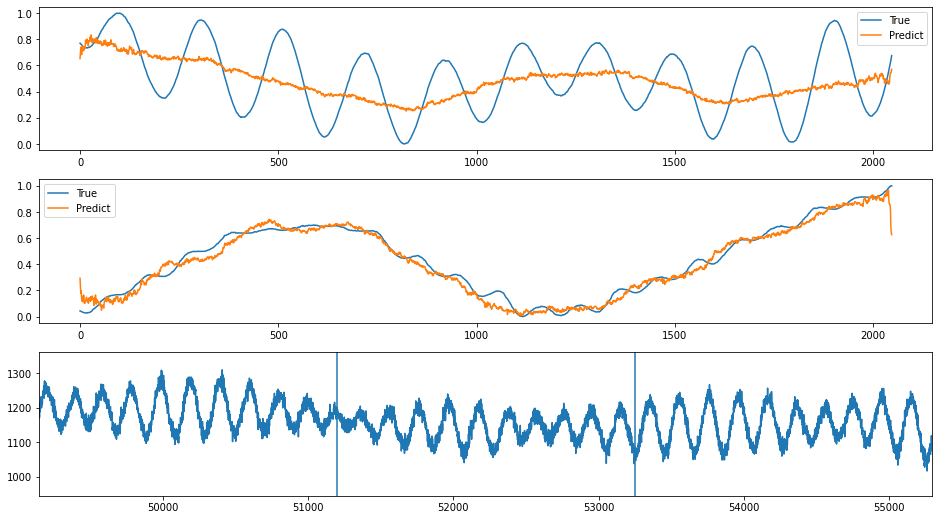

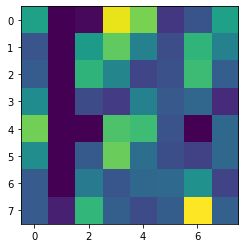

index: 16496
Error: 0.025937372250630142
type                                                         Inst
fill                                                         6731
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-27 20:56:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6731/...
n_bunches                                                     780
bunch_index                                                   984
bunch_number                                                  694
ts_length                                                   65536
chunk                                                           7
Name: 1799, dtype: object


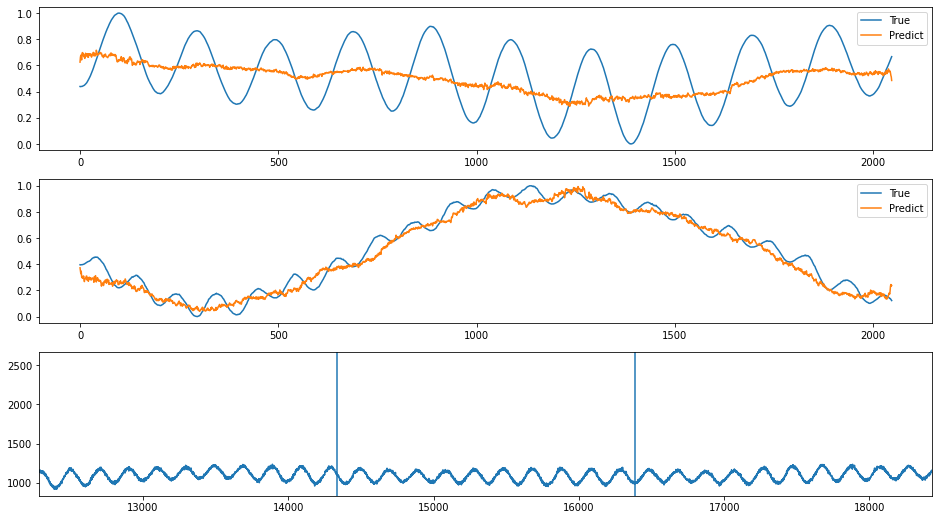

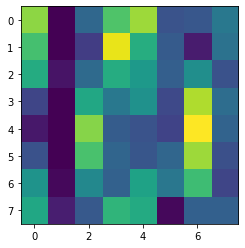

index: 88651
Error: 0.025690402420466385
type                                                         Inst
fill                                                         6630
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-02 01:10:47
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6630/...
n_bunches                                                     926
bunch_index                                                  1443
bunch_number                                                  878
ts_length                                                   65536
chunk                                                          19
Name: 4972, dtype: object


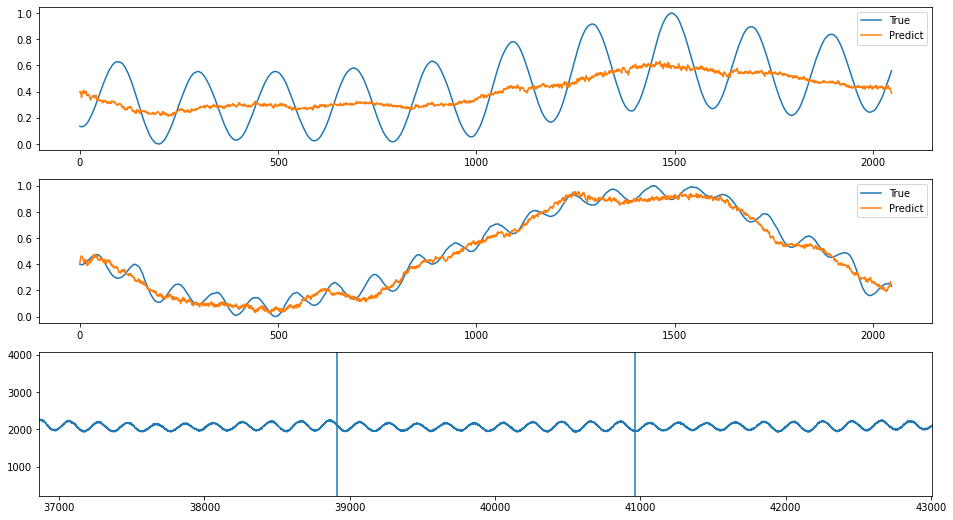

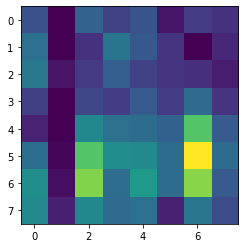

index: 252163
Error: 0.02565262742881658
type                                                         Inst
fill                                                         7078
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-23 14:14:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7078/...
n_bunches                                                     636
bunch_index                                                   786
bunch_number                                                  560
ts_length                                                   65536
chunk                                                          28
Name: 7259, dtype: object


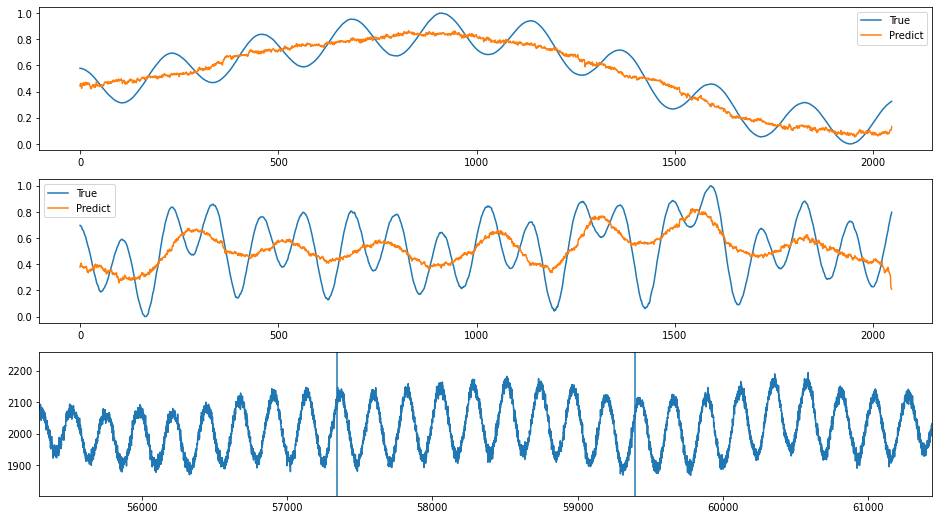

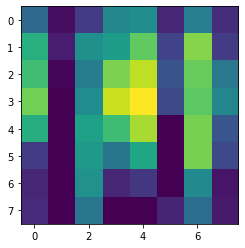

index: 95528
Error: 0.025600634163644106
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 01:16:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                     300
bunch_index                                                   441
bunch_number                                                  221
ts_length                                                   65536
chunk                                                          26
Name: 6813, dtype: object


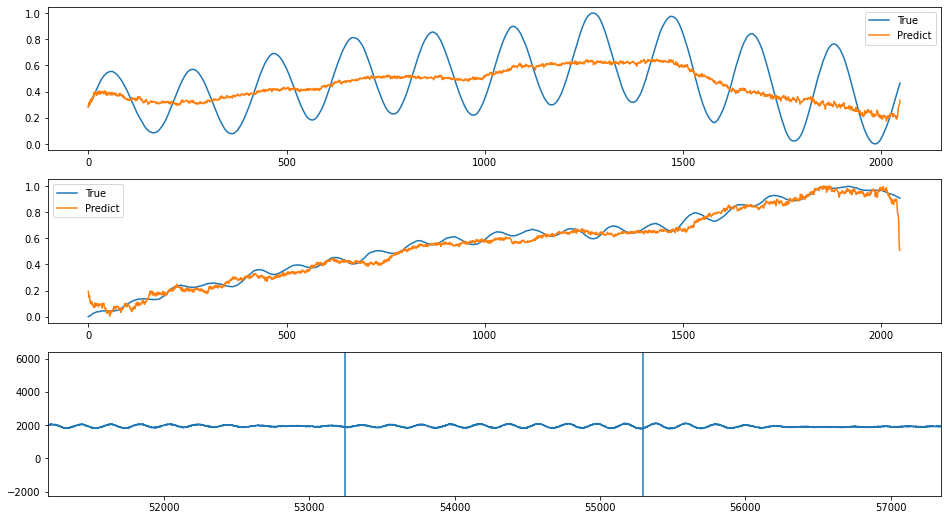

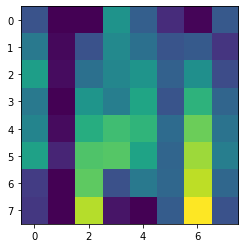

index: 350416
Error: 0.025529380041345237
type                                                         Inst
fill                                                         6900
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-08 01:58:27
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6900/...
n_bunches                                                     828
bunch_index                                                  1076
bunch_number                                                  785
ts_length                                                   65536
chunk                                                           9
Name: 2524, dtype: object


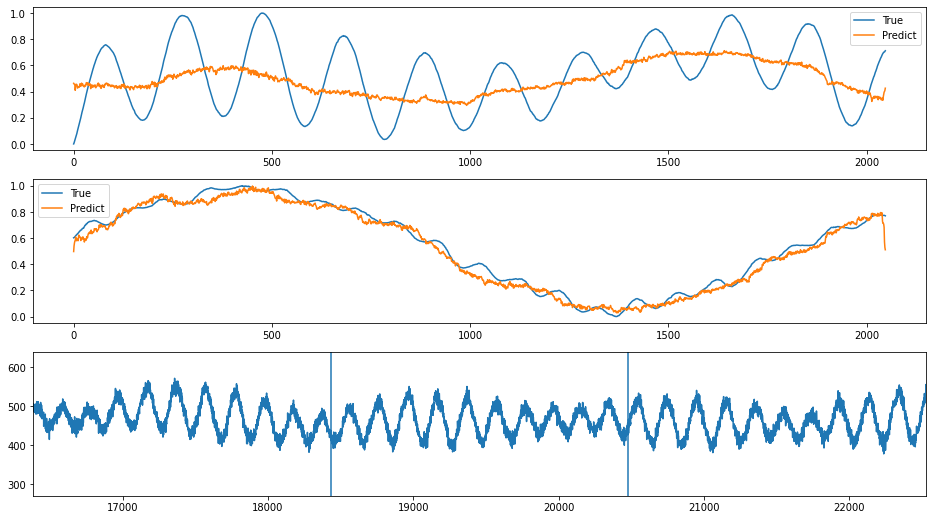

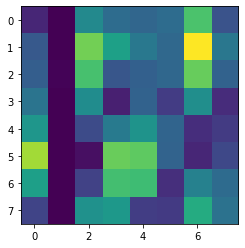

index: 245007
Error: 0.02536353554628864
type                                                         Inst
fill                                                         6640
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-04 08:49:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6640/...
n_bunches                                                     156
bunch_index                                                   192
bunch_number                                                  123
ts_length                                                   65536
chunk                                                           5
Name: 1507, dtype: object


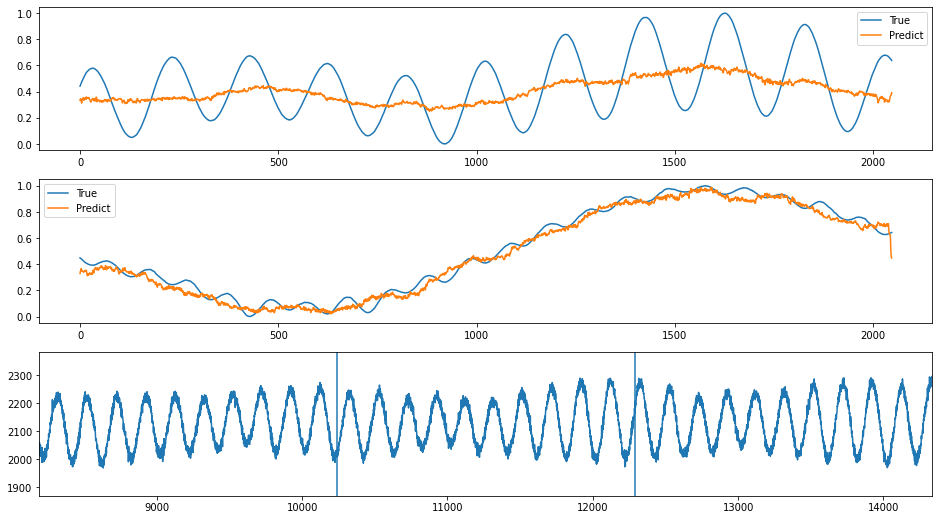

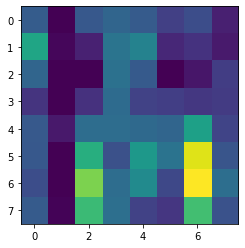

index: 327957
Error: 0.025138876097569568
type                                                         Inst
fill                                                         6757
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-04 04:21:04
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6757/...
n_bunches                                                     924
bunch_index                                                  1037
bunch_number                                                  740
ts_length                                                   65536
chunk                                                          26
Name: 6707, dtype: object


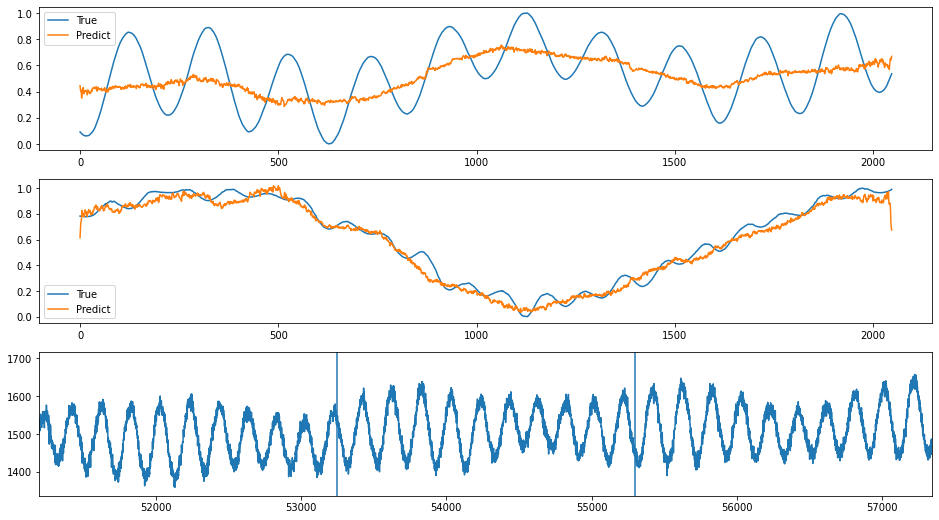

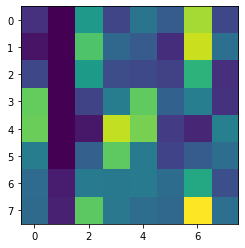

index: 222973
Error: 0.024983143577559964
type                                                         Inst
fill                                                         6356
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-01 22:37:19
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6356/...
n_bunches                                                     908
bunch_index                                                   275
bunch_number                                                  142
ts_length                                                   65536
chunk                                                           3
Name: 828, dtype: object


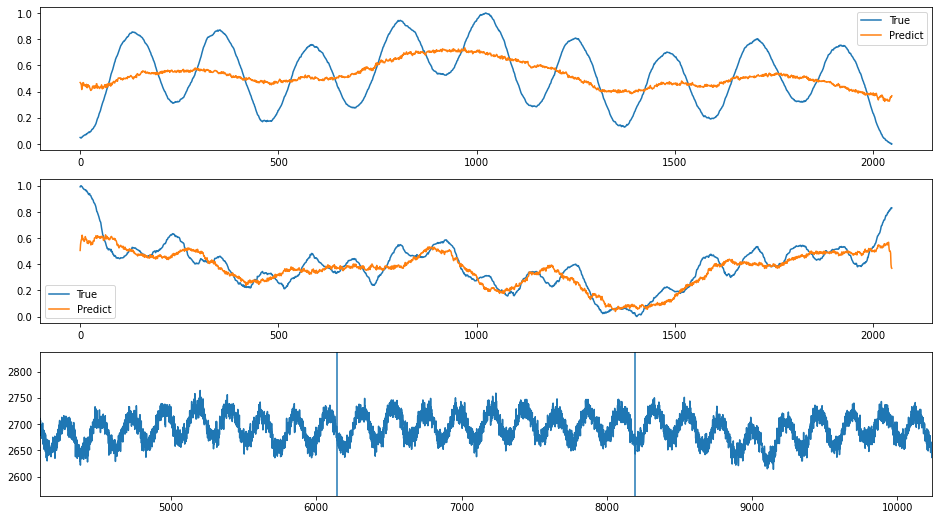

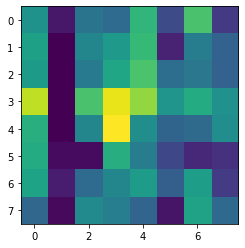

index: 49692
Error: 0.02492683675663185
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                  1096
bunch_number                                                  593
ts_length                                                   65536
chunk                                                          27
Name: 7039, dtype: object


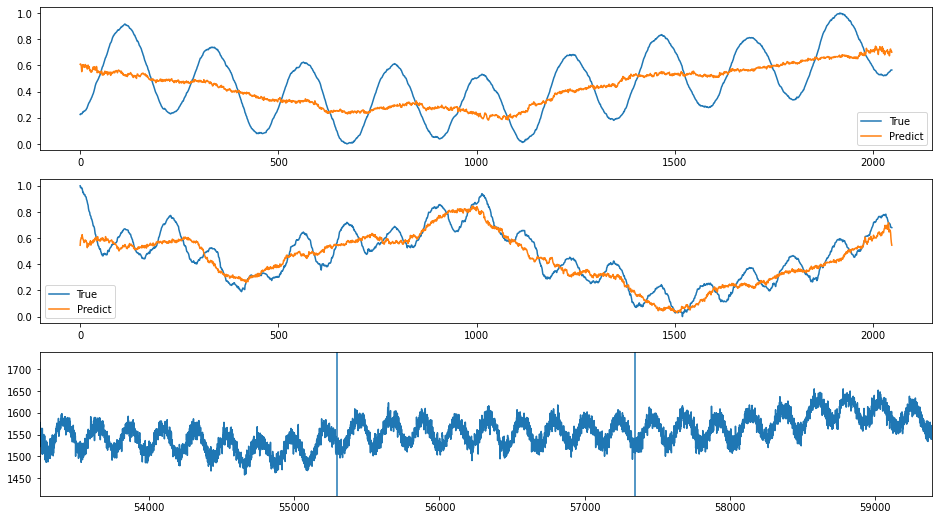

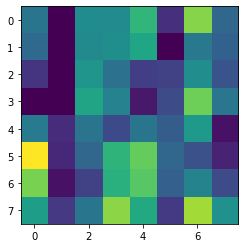

index: 179374
Error: 0.024585078095548905
type                                                         Inst
fill                                                         6760
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-05 16:00:51
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6760/...
n_bunches                                                    1068
bunch_index                                                  1445
bunch_number                                                 1058
ts_length                                                   65536
chunk                                                           1
Name: 506, dtype: object


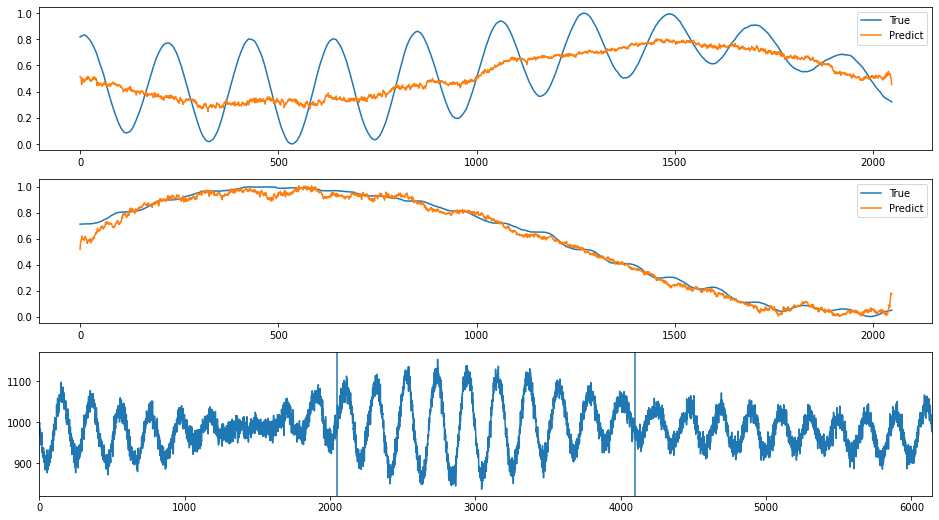

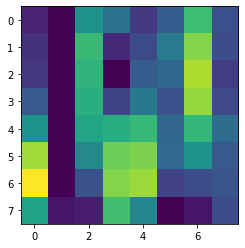

index: 102020
Error: 0.024412482108534375
type                                                         Inst
fill                                                         6272
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 01:16:31
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6272/...
n_bunches                                                     300
bunch_index                                                   441
bunch_number                                                  221
ts_length                                                   65536
chunk                                                          22
Name: 5789, dtype: object


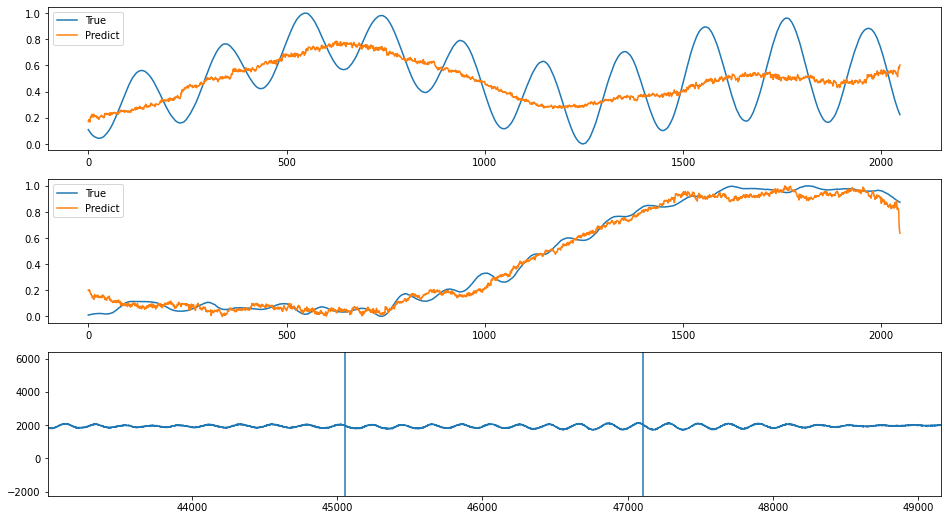

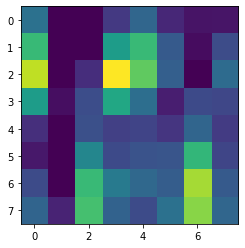

index: 106443
Error: 0.024380421435962706
type                                                         Inst
fill                                                         6988
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-07-27 05:19:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6988/...
n_bunches                                                     444
bunch_index                                                   428
bunch_number                                                  200
ts_length                                                   65536
chunk                                                          12
Name: 3301, dtype: object


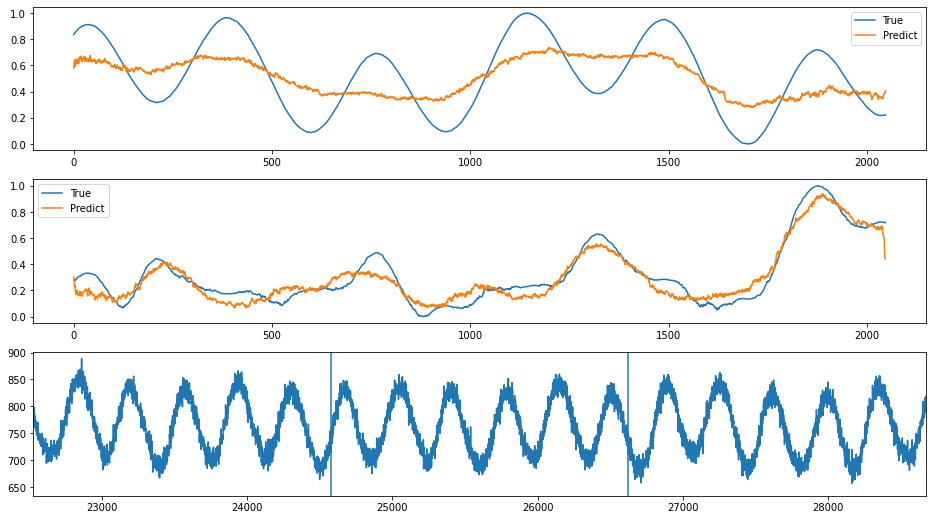

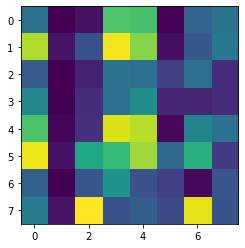

index: 93094
Error: 0.024323510839674767
type                                                         Inst
fill                                                         6630
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-02 01:10:47
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6630/...
n_bunches                                                     926
bunch_index                                                  1443
bunch_number                                                  878
ts_length                                                   65536
chunk                                                          10
Name: 2668, dtype: object


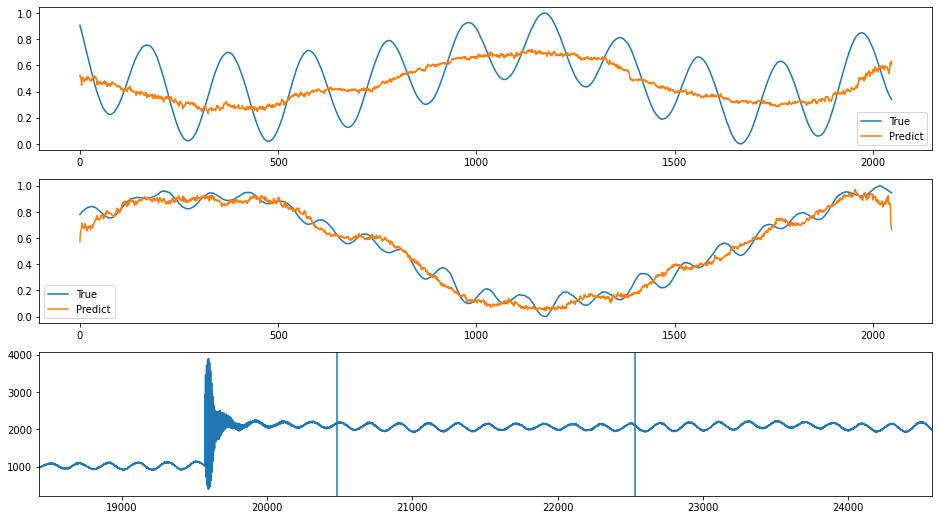

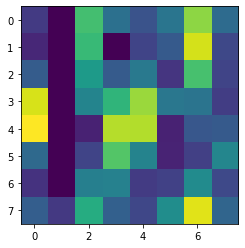

index: 261217
Error: 0.024118559297975576
type                                                         Inst
fill                                                         6337
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-27 05:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6337/...
n_bunches                                                    1004
bunch_index                                                   424
bunch_number                                                  221
ts_length                                                   65536
chunk                                                          10
Name: 2797, dtype: object


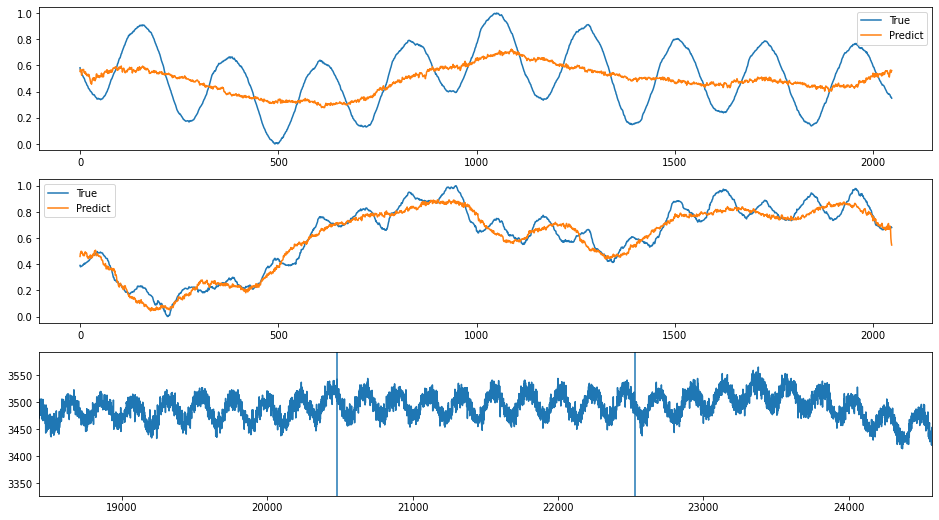

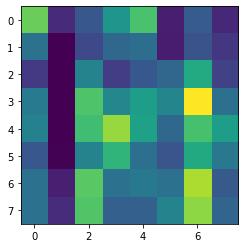

index: 338852
Error: 0.024073011241638936
type                                                         Inst
fill                                                         6640
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-04 08:59:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6640/...
n_bunches                                                     828
bunch_index                                                   659
bunch_number                                                  465
ts_length                                                   65536
chunk                                                          30
Name: 7682, dtype: object


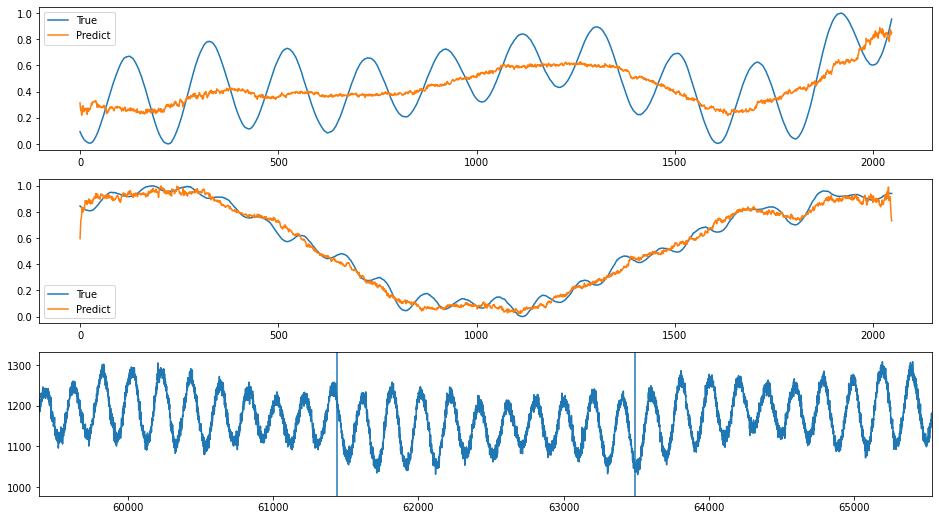

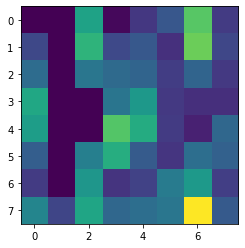

index: 257106
Error: 0.023527687279566077
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 10:56:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                     652
bunch_index                                                   224
bunch_number                                                  110
ts_length                                                   65536
chunk                                                          19
Name: 5097, dtype: object


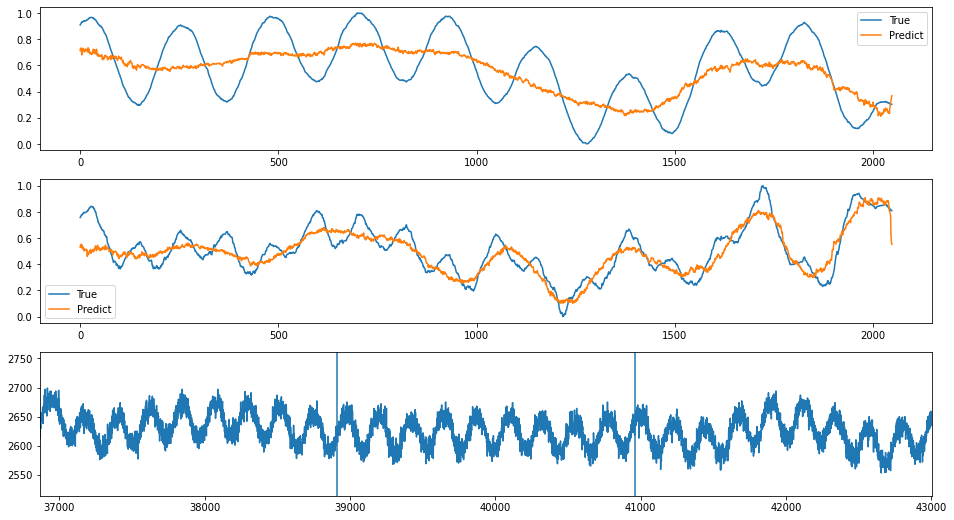

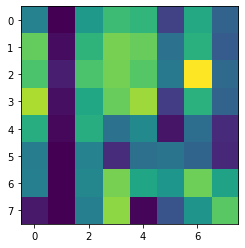

index: 55216
Error: 0.02295672408782968
type                                                         Inst
fill                                                         6768
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-08 07:59:15
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6768/...
n_bunches                                                     636
bunch_index                                                   849
bunch_number                                                  597
ts_length                                                   65536
chunk                                                           2
Name: 651, dtype: object


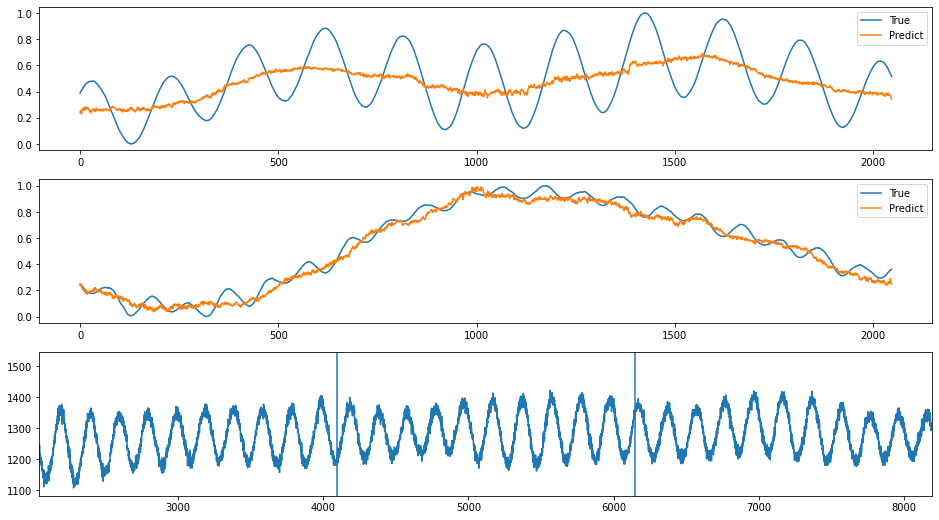

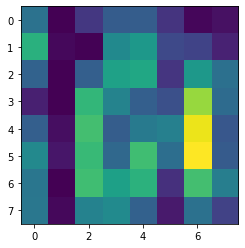

index: 348553
Error: 0.02290549587989798
type                                                         Inst
fill                                                         7441
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-13 06:02:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7441/...
n_bunches                                                     468
bunch_index                                                  1528
bunch_number                                                  280
ts_length                                                   65536
chunk                                                          20
Name: 5335, dtype: object


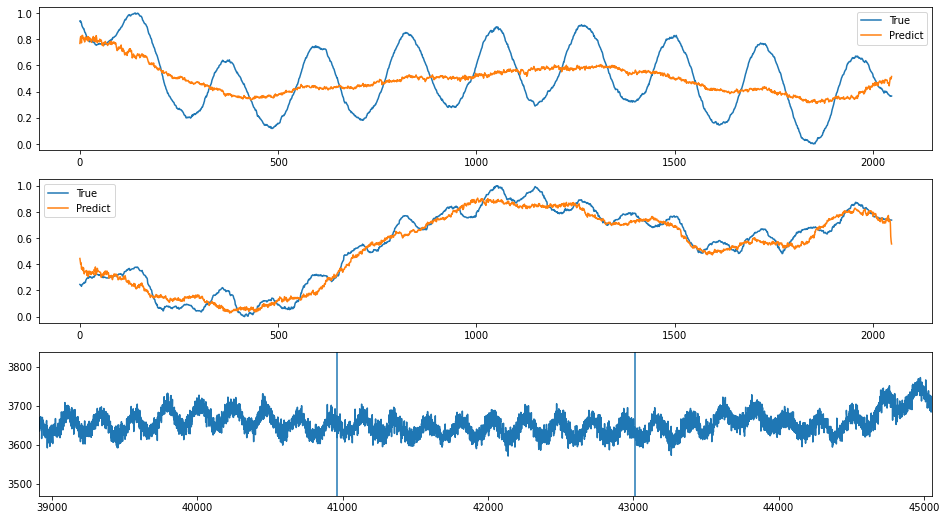

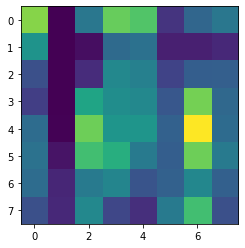

index: 61724
Error: 0.02288723866066286
type                                                         Inst
fill                                                         6266
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-02 18:23:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6266/...
n_bunches                                                     492
bunch_index                                                   900
bunch_number                                                  475
ts_length                                                   65536
chunk                                                          21
Name: 5400, dtype: object


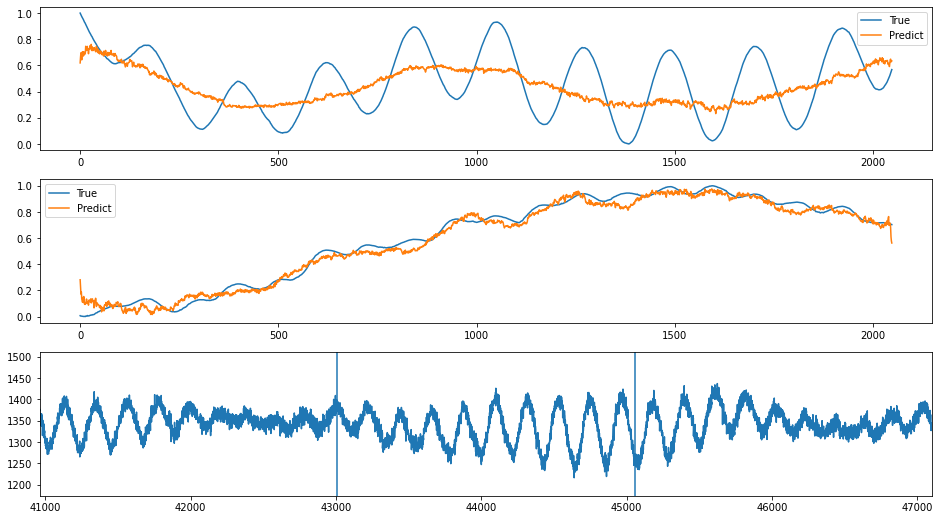

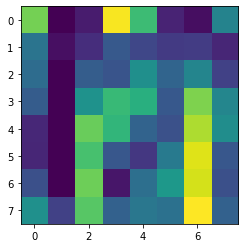

index: 129456
Error: 0.022855942651181016
type                                                         Inst
fill                                                         6640
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-04 09:02:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6640/...
n_bunches                                                    1116
bunch_index                                                  1496
bunch_number                                                 1115
ts_length                                                   65536
chunk                                                           2
Name: 546, dtype: object


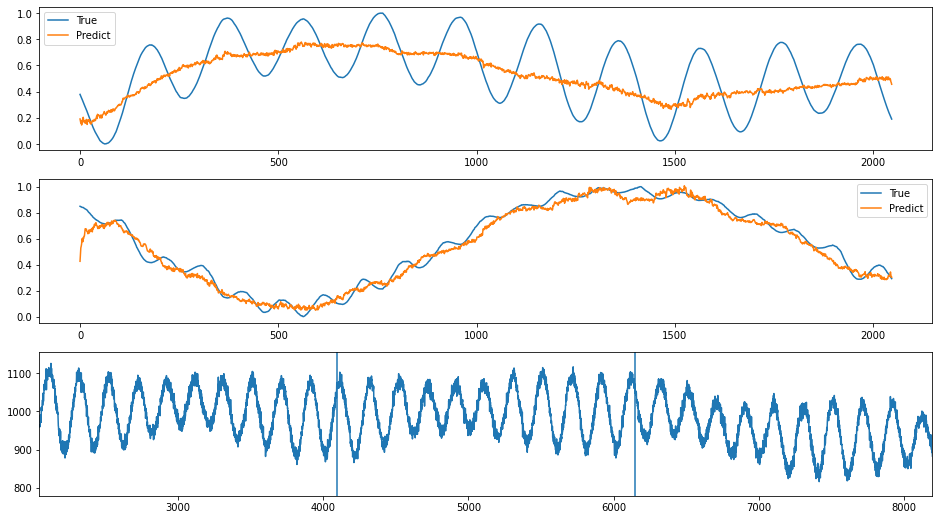

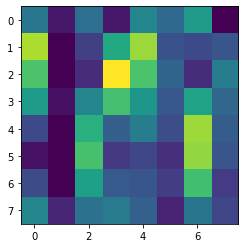

index: 17787
Error: 0.022754484175308717
type                                                         Inst
fill                                                         6731
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-27 20:56:41
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6731/...
n_bunches                                                     780
bunch_index                                                   984
bunch_number                                                  694
ts_length                                                   65536
chunk                                                          20
Name: 5127, dtype: object


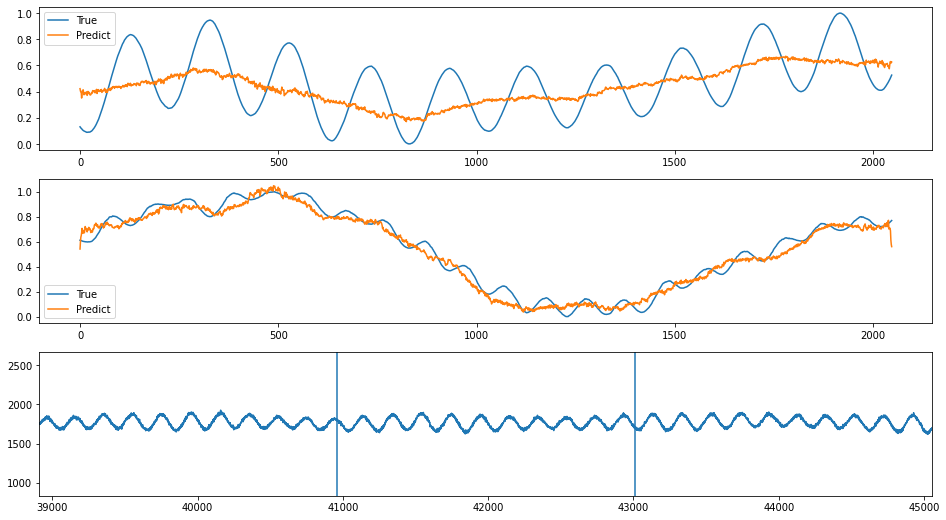

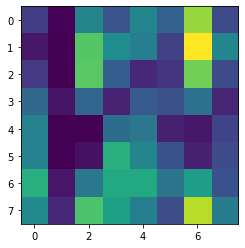

index: 275817
Error: 0.022735176612915648
type                                                         Inst
fill                                                         6390
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-15 15:39:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6390/...
n_bunches                                                     972
bunch_index                                                  1857
bunch_number                                                  969
ts_length                                                   65536
chunk                                                          24
Name: 6266, dtype: object


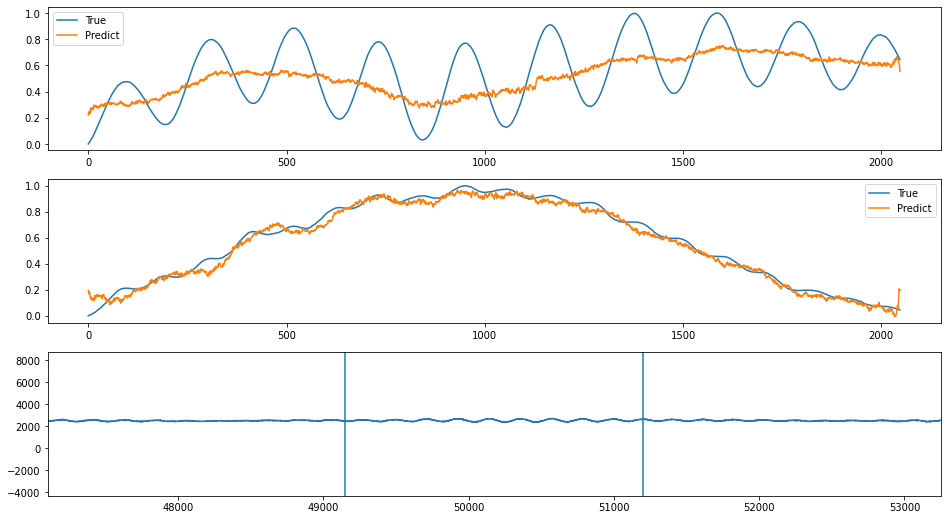

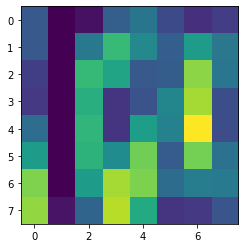

index: 63555
Error: 0.02237996330919246
type                                                         Inst
fill                                                         6255
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-29 06:36:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...
n_bunches                                                    1916
bunch_index                                                  1825
bunch_number                                                  998
ts_length                                                   65536
chunk                                                          27
Name: 6922, dtype: object


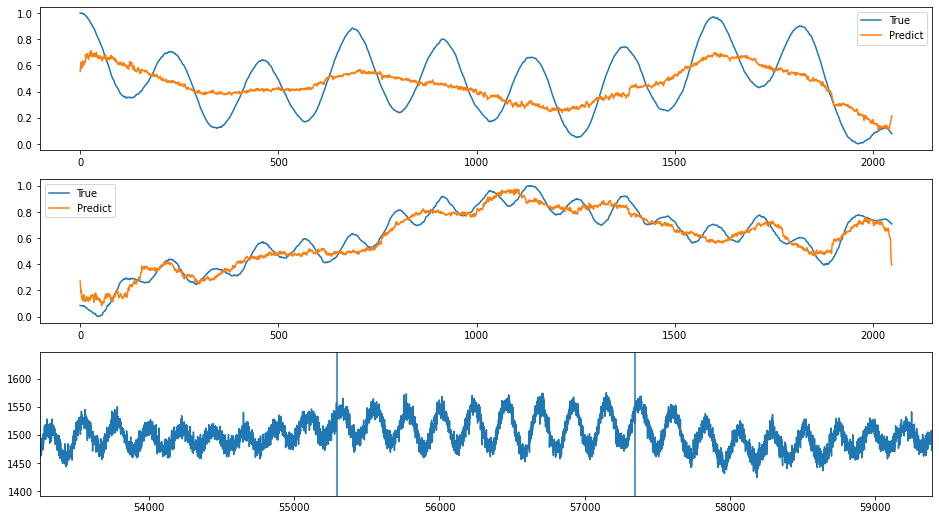

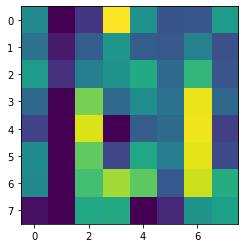

index: 36784
Error: 0.022158915601839215
type                                                         Inst
fill                                                         6689
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-16 01:09:46
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6689/...
n_bunches                                                     649
bunch_index                                                  1402
bunch_number                                                  516
ts_length                                                   65536
chunk                                                           4
Name: 1105, dtype: object


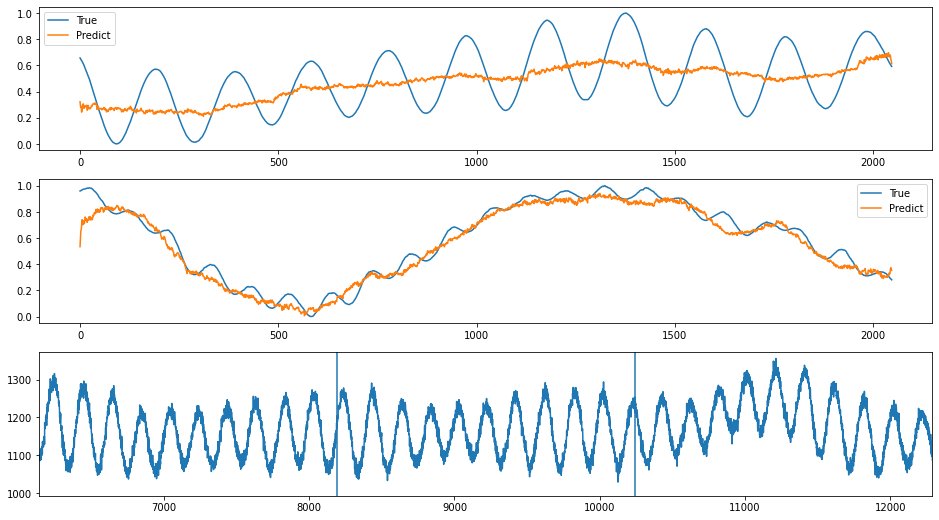

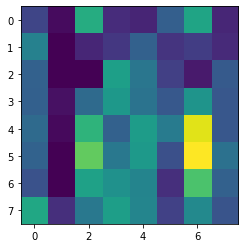

index: 334929
Error: 0.022101423691029534
type                                                         Inst
fill                                                         6733
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-28 04:23:05
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6733/...
n_bunches                                                     540
bunch_index                                                   602
bunch_number                                                  406
ts_length                                                   65536
chunk                                                           7
Name: 2028, dtype: object


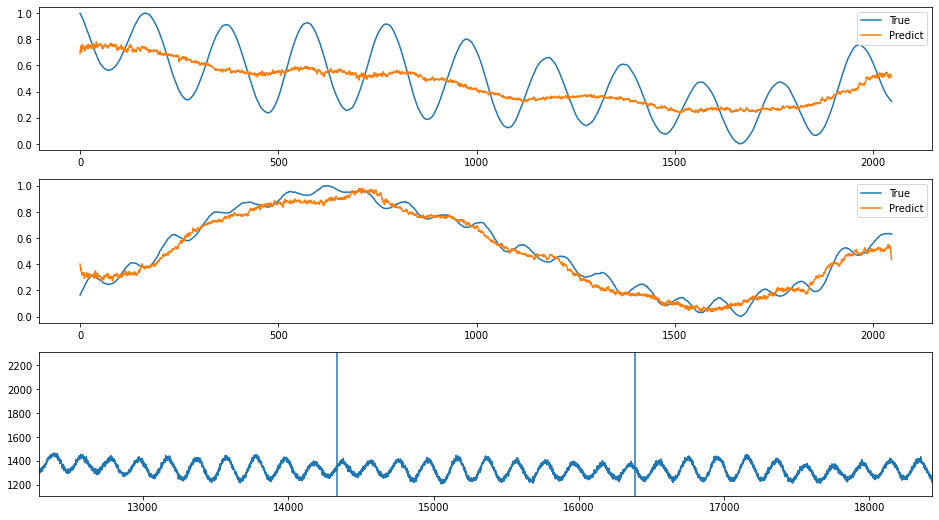

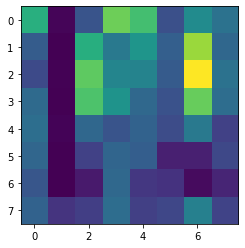

index: 161671
Error: 0.022001270023704944
type                                                         Inst
fill                                                         6184
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-09 23:52:01
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6184/...
n_bunches                                                    1188
bunch_index                                                   401
bunch_number                                                  210
ts_length                                                   65536
chunk                                                          27
Name: 7147, dtype: object


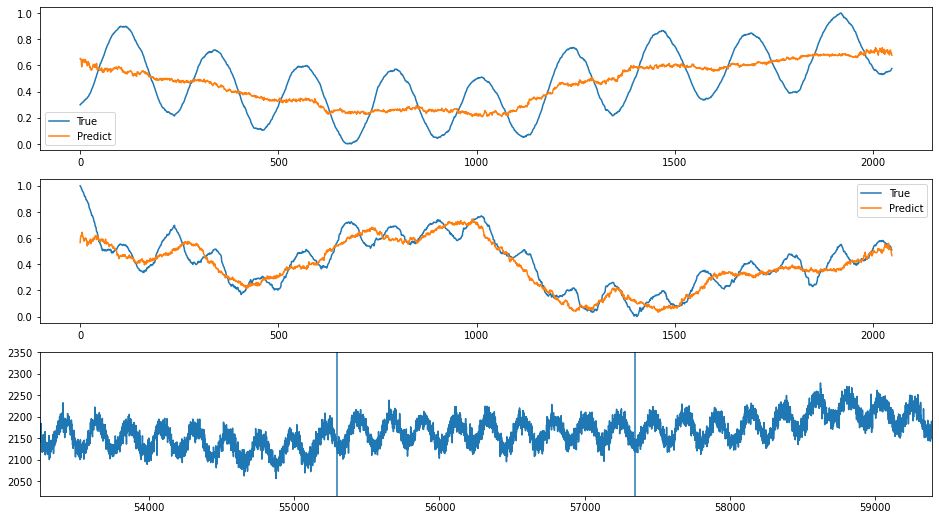

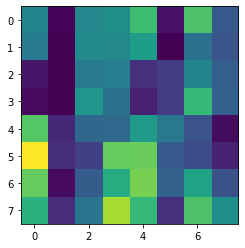

index: 236385
Error: 0.021855545816307984
type                                                         Inst
fill                                                         6787
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-13 19:21:02
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6787/...
n_bunches                                                    1068
bunch_index                                                  1092
bunch_number                                                  783
ts_length                                                   65536
chunk                                                          23
Name: 5918, dtype: object


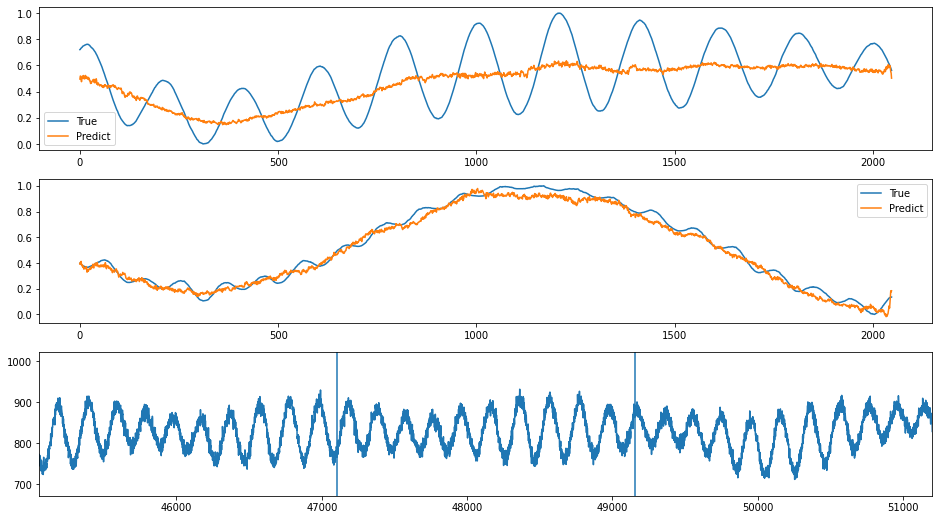

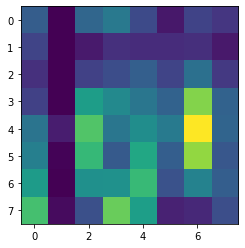

index: 188873
Error: 0.02183000891770088
type                                                         Inst
fill                                                         6337
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-27 05:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6337/...
n_bunches                                                    1004
bunch_index                                                   413
bunch_number                                                  214
ts_length                                                   65536
chunk                                                          10
Name: 2703, dtype: object


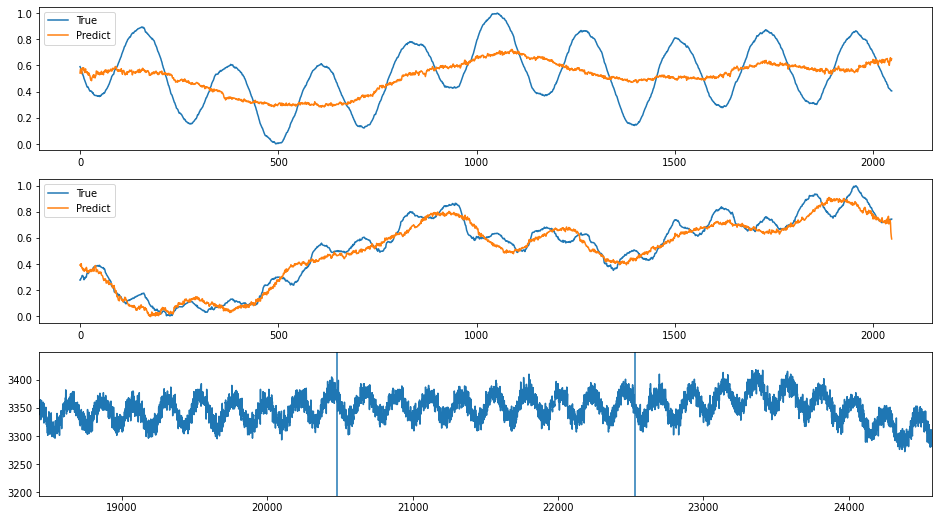

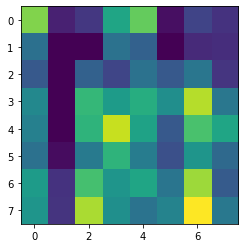

index: 280754
Error: 0.02180291230370346
type                                                         Inst
fill                                                         6275
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-05 19:37:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6275/...
n_bunches                                                     300
bunch_index                                                   451
bunch_number                                                  237
ts_length                                                   65536
chunk                                                           4
Name: 1034, dtype: object


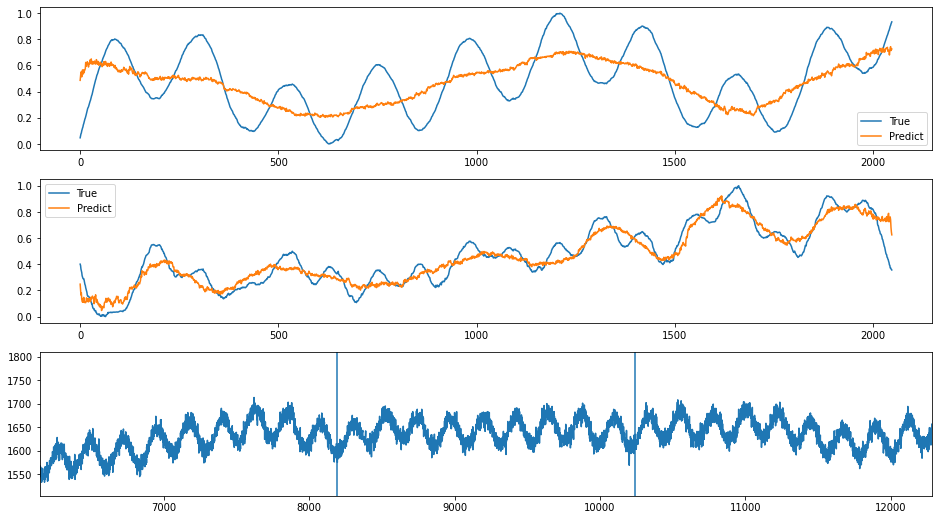

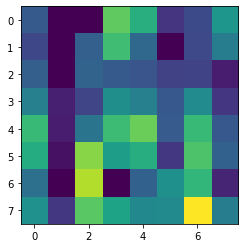

index: 166763
Error: 0.021613073828587622
type                                                         Inst
fill                                                         6741
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-30 10:00:48
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6741/...
n_bunches                                                     396
bunch_index                                                   489
bunch_number                                                  331
ts_length                                                   65536
chunk                                                          17
Name: 4512, dtype: object


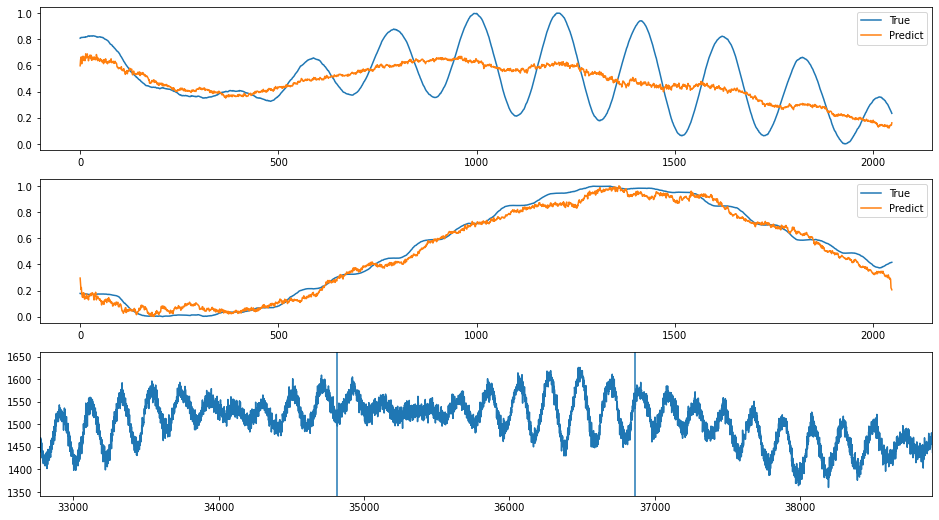

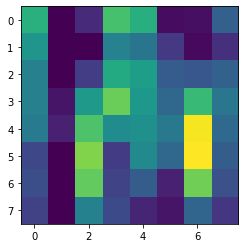

In [26]:
for i in range(1, 51):
    index = sorted_error_indices[-i]
    plot_train_index(index)

# Around the peak

In [27]:
error_around_peak = abs(train_error - hist_peak)
sorted_error_indices_around_peak = np.argsort(error_around_peak)

index: 307714
Error: 0.001009204003345651
type                                                         Inst
fill                                                         6757
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-06-04 08:23:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6757/...
n_bunches                                                    2556
bunch_index                                                  2386
bunch_number                                                 1746
ts_length                                                   65536
chunk                                                          28
Name: 7338, dtype: object


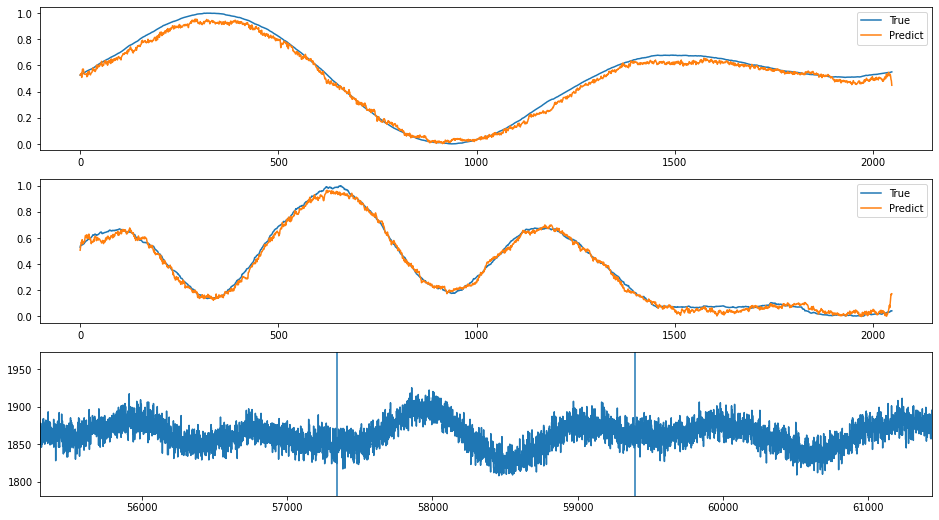

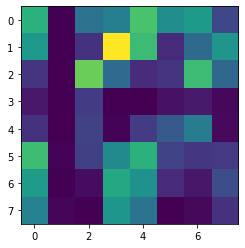

index: 9114
Error: 0.001009209627539063
type                                                         Inst
fill                                                         7466
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-11-22 21:56:16
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7466/...
n_bunches                                                     670
bunch_index                                                   988
bunch_number                                                  205
ts_length                                                   65536
chunk                                                          22
Name: 5701, dtype: object


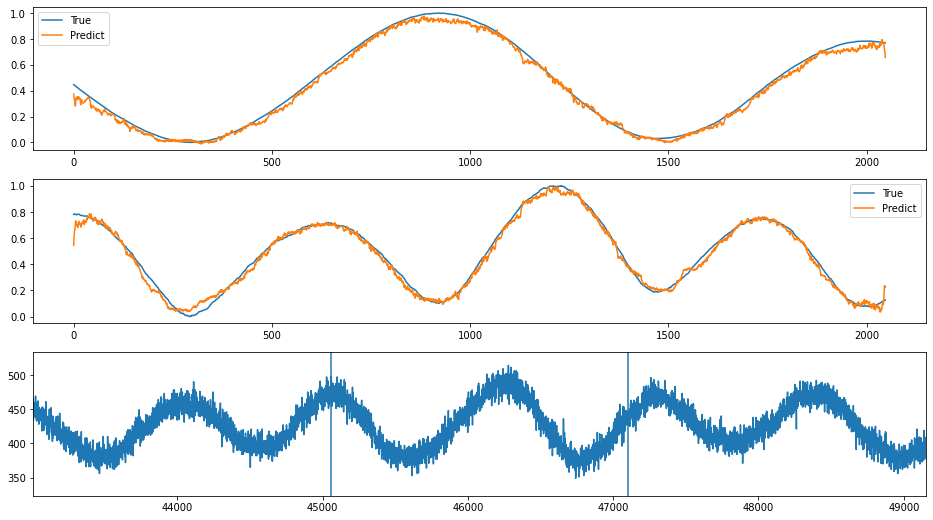

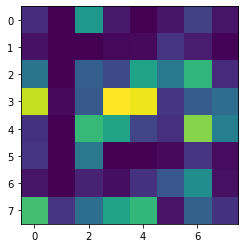

index: 10879
Error: 0.0010091897909087265
type                                                         Inst
fill                                                         7037
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-08-08 03:50:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7037/...
n_bunches                                                    2556
bunch_index                                                  1664
bunch_number                                                 1216
ts_length                                                   65536
chunk                                                          12
Name: 3282, dtype: object


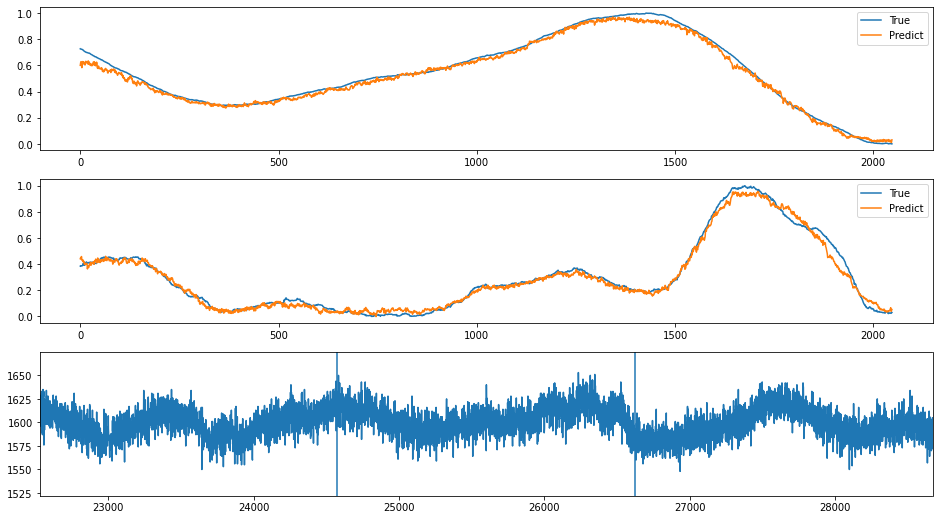

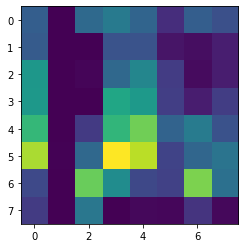

index: 274911
Error: 0.0010091824994256857
type                                                         Inst
fill                                                         6688
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-15 22:28:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6688/...
n_bunches                                                     987
bunch_index                                                  1152
bunch_number                                                  340
ts_length                                                   65536
chunk                                                          23
Name: 6124, dtype: object


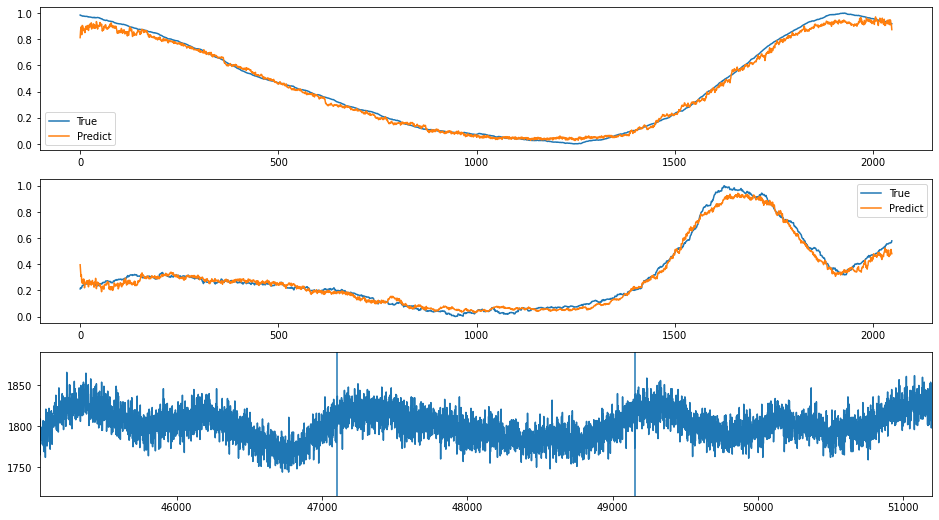

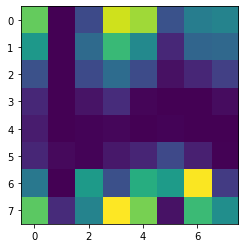

index: 114535
Error: 0.0010092328230929572
type                                                         Inst
fill                                                         6346
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-10-29 13:20:13
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6346/...
n_bunches                                                    1868
bunch_index                                                  2919
bunch_number                                                 1567
ts_length                                                   65536
chunk                                                          15
Name: 3952, dtype: object


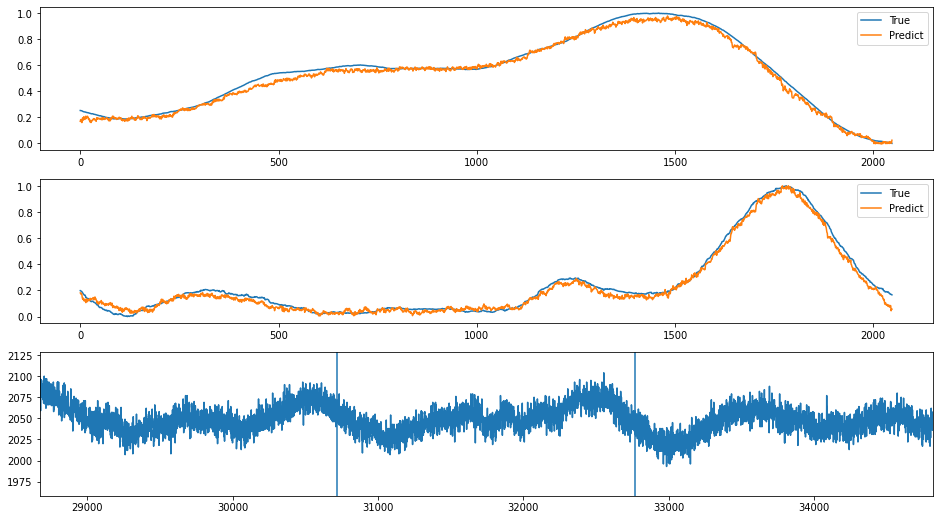

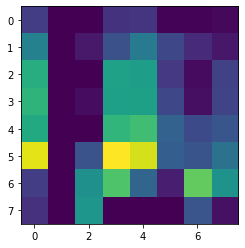

index: 50327
Error: 0.0010092456980989417
type                                                         Inst
fill                                                         6711
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-22 05:07:20
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6711/...
n_bunches                                                    2556
bunch_index                                                   738
bunch_number                                                  528
ts_length                                                   65536
chunk                                                          19
Name: 4987, dtype: object


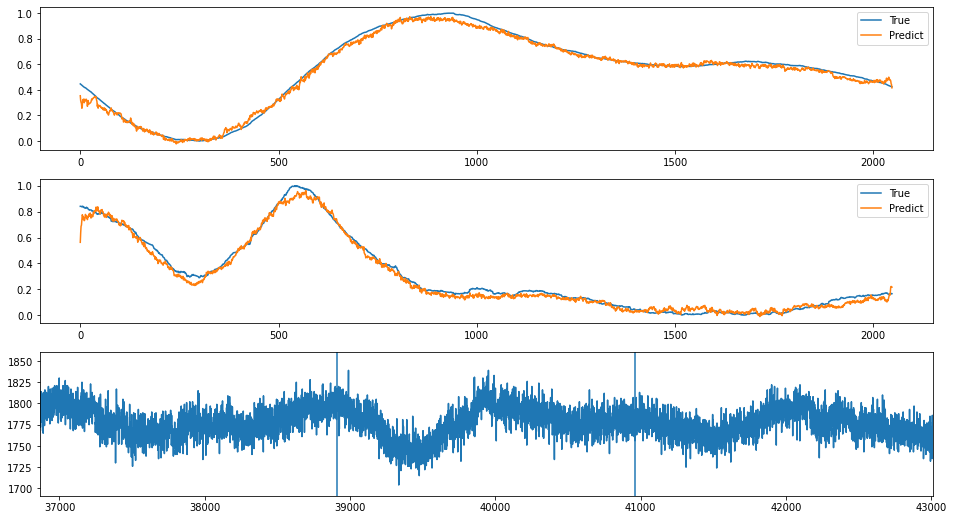

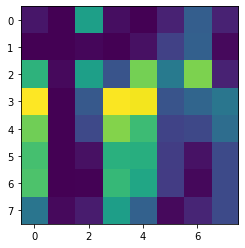

index: 356911
Error: 0.0010091650916892445
type                                                         Inst
fill                                                         6628
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-01 06:08:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6628/...
n_bunches                                                    1551
bunch_index                                                  2296
bunch_number                                                 1081
ts_length                                                   65536
chunk                                                           7
Name: 1886, dtype: object


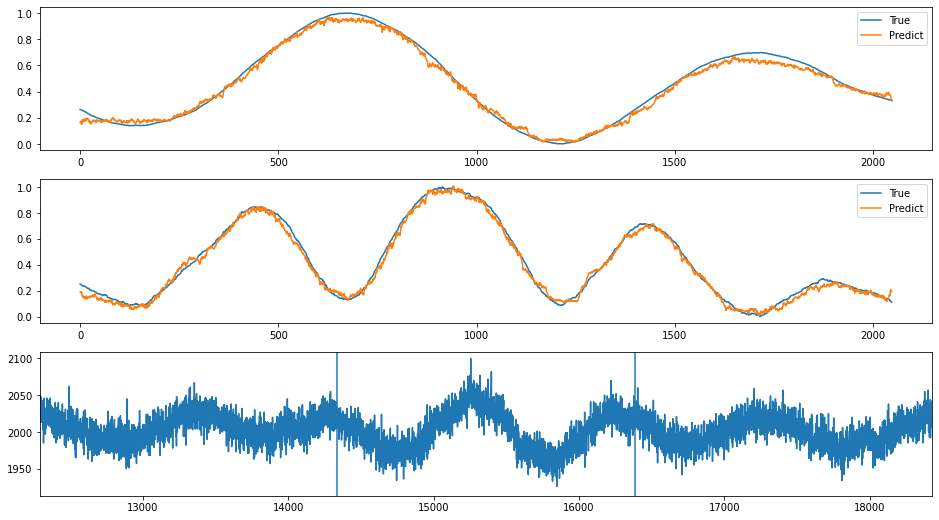

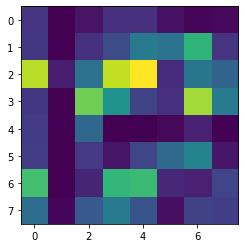

index: 246321
Error: 0.0010092487997532572
type                                                         Inst
fill                                                         6629
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2018-05-01 13:29:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6629/...
n_bunches                                                    1887
bunch_index                                                  2854
bunch_number                                                 1553
ts_length                                                   65536
chunk                                                          26
Name: 6891, dtype: object


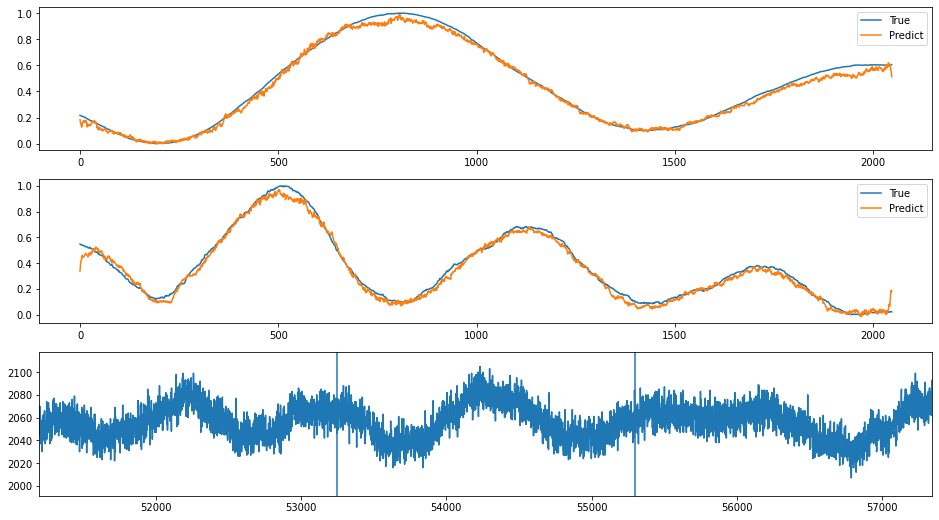

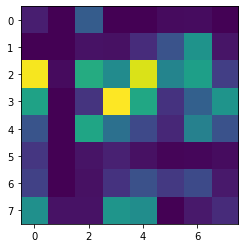

index: 367199
Error: 0.0010091621440455618
type                                                         Inst
fill                                                         6429
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-11-28 05:22:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6429/...
n_bunches                                                     652
bunch_index                                                  3070
bunch_number                                                  527
ts_length                                                   65536
chunk                                                           2
Name: 538, dtype: object


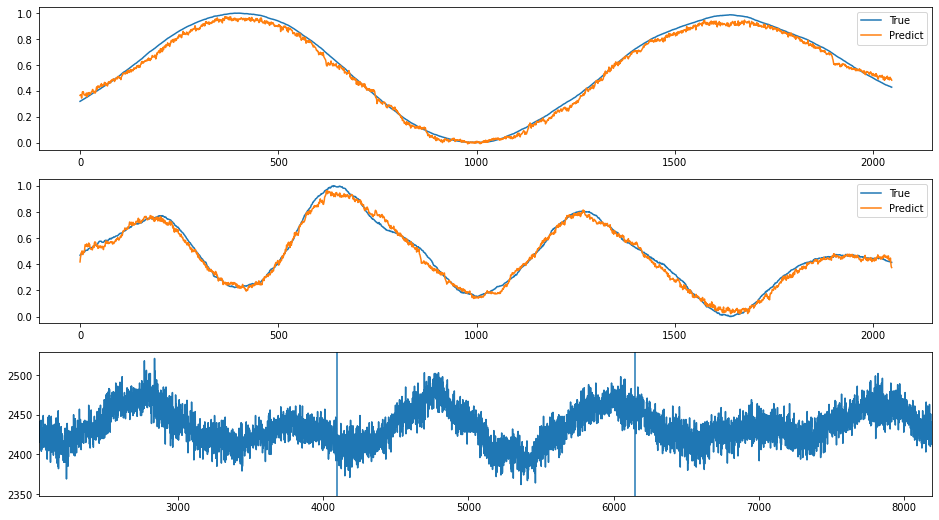

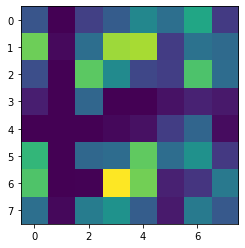

index: 26346
Error: 0.0010092529930491052
type                                                         Inst
fill                                                         6239
beam                                                            1
plane                                                           h
q                                                               7
date_time                                     2017-09-24 04:49:14
file            /nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6239/...
n_bunches                                                    1358
bunch_index                                                  2171
bunch_number                                                  820
ts_length                                                   65536
chunk                                                           7
Name: 1853, dtype: object


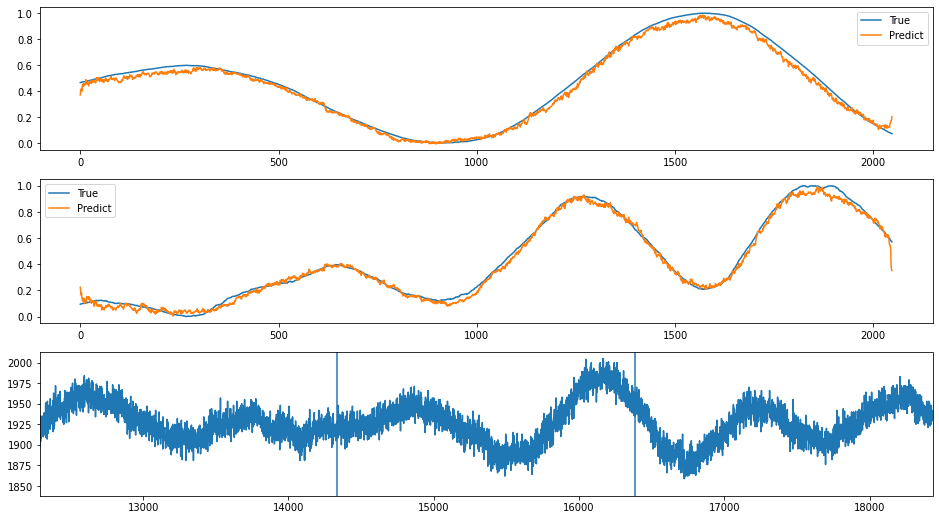

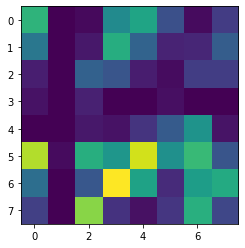

In [28]:
for i in range(10):
    index = sorted_error_indices_around_peak[i]
    plot_train_index(index)

# Around a point

In [29]:
# point = 

In [30]:
# error_around_peak = abs(train_error - point)
# sorted_error_indices_around_point = np.argsort(error_around_peak)

In [31]:
# for i in range(10):
#     index = sorted_error_indices_around_point[i]
#     plot_train_index(index)

# Clustering

In [32]:
indices = sorted_error_indices[-np.arange(1, 1024+1)]
encoding_true = train_data[indices]
encoding_pred = train_prediction[indices]
encoding_meta = train_meta.iloc[indices]
encoded = checker.encode(encoding_true)
encoded_2d = encoded.reshape(encoded.shape[0], -1)

In [33]:
encoded_2d.shape

(1024, 64)

In [34]:
def plot_clusters(cluster_indices):
    print(f"N samples: {len(cluster_indices)}")
    fig, axes = plt.subplots(2,1, figsize=(12, 3))
    axes[0].plot(encoding_true[cluster_indices][:,:, 0].T, linewidth=0, marker=',', alpha=0.1)
    axes[1].plot(encoding_true[cluster_indices][:,:, 1].T, linewidth=0, marker=',', alpha=0.1)
    return fig, axes

In [35]:
import sklearn
from sklearn.manifold import TSNE

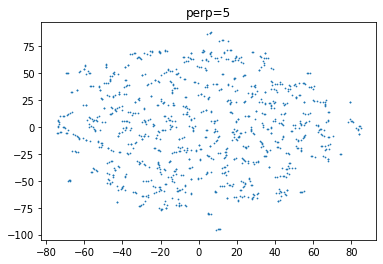

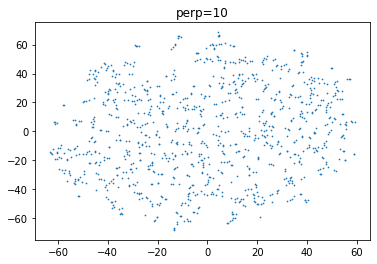

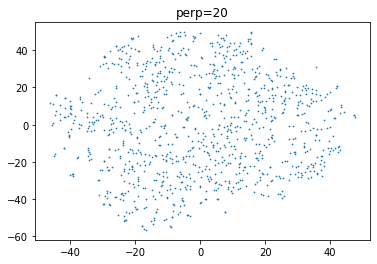

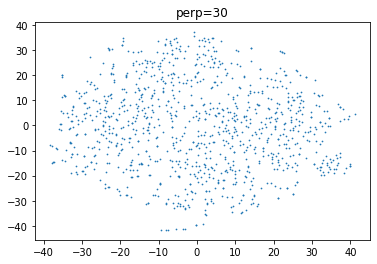

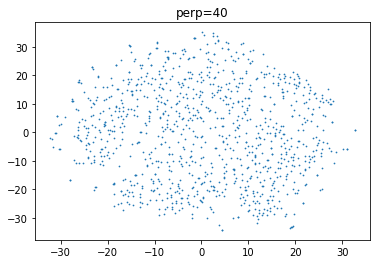

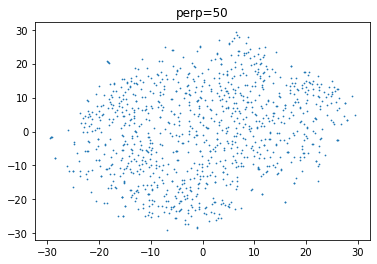

In [36]:
for perplexity in [5, 10, 20, 30, 40, 50]: 
    tsne = TSNE(perplexity=perplexity)
    encoded_2d_tsne = tsne.fit_transform(encoded_2d)
    plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2)
    plt.title(f"perp={perplexity}")
    plt.show()

In [37]:
tsne = TSNE(perplexity=30)
encoded_2d_tsne = tsne.fit_transform(encoded_2d)

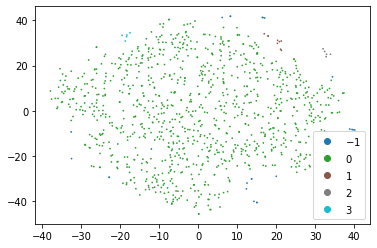

cluster -1
N samples: 27


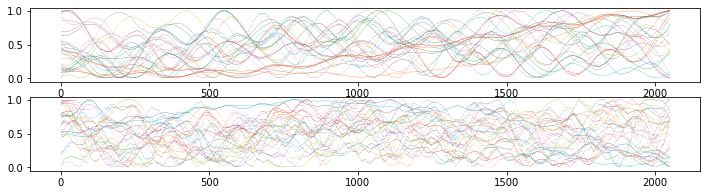

cluster 0
N samples: 978


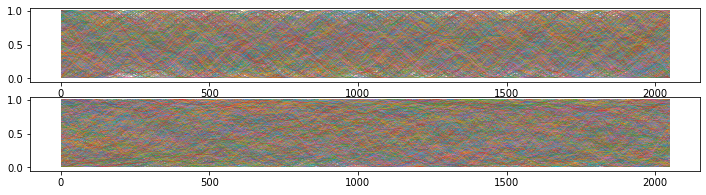

cluster 1
N samples: 9


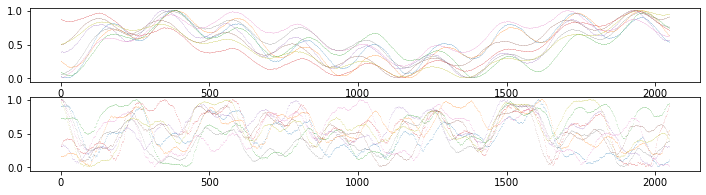

cluster 2
N samples: 5


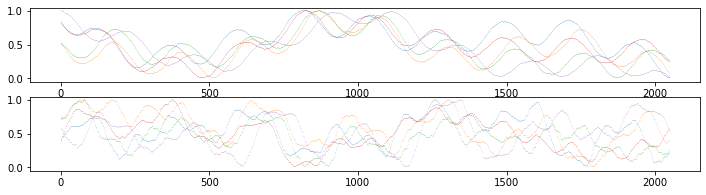

cluster 3
N samples: 5


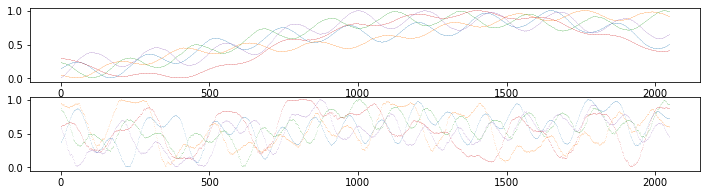

In [38]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4)
clustering = dbscan.fit(encoded_2d_tsne)
sc = plt.scatter(encoded_2d_tsne[:, 0], encoded_2d_tsne[:, 1], marker='.', s=2, c=clustering.labels_, cmap='tab10')
plt.legend(*sc.legend_elements())
plt.show()
for cluster in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster)[0]
    print("cluster", cluster)
    fig, axes = plot_clusters(cluster_indices)
    plt.show()